# Fits of the phase boundary of TmVO4 extracted from MCE data

## Importation of modules and data

In [1]:
from datetime import date
import os

import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

from lmfit import minimize, Parameters

import matplotlib as mpl
from matplotlib import pyplot as plt, rc, rcParams#, ticker
print(mpl.matplotlib_fname())

C:\Users\Pierre\.matplotlib\matplotlibrc


In [2]:
# inline interactive plotting using the nbAgg backend; 
%matplotlib notebook
rcParams['figure.subplot.hspace'] = 0# remove vertical space between subplots
text = {'usetex': True}
# rc('text', **text)
today = date.today()

In [3]:
# Define sample parameters 
# He3 sample is TmVO4-LS5200-needles, DR sample is TmVO4-LS5228-DR-HC1807
samples = {0:'TmVO4-LS5200',
           1:'TmVO4-LS5228'}

mce_data_dir = {samples[0]:r'C:\Users\Pierre\Desktop\Postdoc\TmVO4\TmVO4_heat-capacity\2017-07_TmVO4_Cp_MCE\2017-07-28--31\Massaic_MCE\Extracted_critical_fields', 
               samples[1]:r'C:\Users\Pierre\Desktop\Postdoc\TmVO4\TmVO4_heat-capacity\2018-08_TmVO4-LS5228\Extracted_critical_fields'}

mce_data_file = {samples[0]:'2021-05-26_TmVO4-LS5200_Hc_all_runs.csv',
                samples[1]:'2021-05-27_TmVO4-LS5228-DR-HC1807_Hc_all_runs.csv'}

cp_data_dir = {samples[0]:r'C:\Users\Pierre\Desktop\Postdoc\TmVO4\TmVO4_heat-capacity\2017-07_TmVO4_Cp_MCE\2017-07-28--31\2017-07-28_Cp', 
               samples[1]:r'C:\Users\Pierre\Desktop\Postdoc\TmVO4\TmVO4_heat-capacity\2018-08_TmVO4-LS5228'}

cp_data_file = {samples[0]:r'TmVO4_Mosaic_2017-07-28.dat',
                 samples[1]:r'2018-07-31_TmVO4-LS5228-DR-HC180731.dat'}

# Choose which sample to work with
sample = samples[0]

Nsamples = len(samples)# number of samples
Nsamples

2

In [4]:
mce_data_list = [None]*Nsamples
for idx in range(Nsamples):
    os.chdir(mce_data_dir[samples[idx]])
    print(os.getcwd())
    mce_data_list[idx] = pd.read_csv(mce_data_file[samples[idx]], comment='#')

mce_data = tuple(mce_data_list)
mce_data[idx]

C:\Users\Pierre\Desktop\Postdoc\TmVO4\TmVO4_heat-capacity\2017-07_TmVO4_Cp_MCE\2017-07-28--31\Massaic_MCE\Extracted_critical_fields
C:\Users\Pierre\Desktop\Postdoc\TmVO4\TmVO4_heat-capacity\2018-08_TmVO4-LS5228\Extracted_critical_fields


Date  Run number  Sweeprate  Tbath  Hc_measured        Tc  \
0   2018-08-01           0       10.0    0.7  5243.541992  0.714026   
1   2018-08-01           0       10.0    0.9  5124.268066  0.903264   
2   2018-08-01           0       10.0    1.0  5094.531494  1.010896   
3   2018-08-01           0       10.0    1.2  4976.892334  1.215976   
4   2018-08-01           0       10.0    1.4  4688.467285  1.425613   
5   2018-08-01           0       10.0    1.6  4257.239746  1.644601   
6   2018-08-01           0       10.0    1.8  3619.604004  1.864751   
7   2018-08-01           0       20.0    0.6  5186.448486  0.599730   
8   2018-08-01           0       20.0    0.7  5274.552979  0.696963   
9   2018-08-01           0       20.0    0.8  5241.564453  0.798219   
10  2018-08-01           0       20.0    1.1  5081.358154  1.099572   
11  2018-08-01           0       20.0    1.3  4934.072266  1.311562   
12  2018-08-01           0       20.0    1.5  4542.188477  1.527770   
13  2018-08-01           0       20.0    1.7  4021.759888  1.749537   

           dHc   deltaHc  deltaHcErr    rhc  Hc_inferred  
0    38.871874  0.001232    0.007413  0.968  5075.748648  
1   191.369223  0.009900    0.037346  0.968  4960.291488  
2   191.369223  0.004018    0.037564  0.968  4931.506486  
3    38.871874 -0.009422    0.007810  0.968  4817.631779  
4    38.871874 -0.017803    0.008291  0.968  4538.436332  
5    38.871874 -0.032237    0.009131  0.968  4121.008074  
6    38.871874 -0.103493    0.010739  0.968  3503.776676  
7    56.612661  0.015146    0.010915  0.968  5020.482135  
8    56.612661 -0.003707    0.010733  0.968  5105.767283  
9    56.612661 -0.002206    0.010801  0.968  5073.834391  
10   56.612661 -0.007155    0.011141  0.968  4918.754693  
11   56.612661 -0.025146    0.011474  0.968  4776.181953  
12   56.612661 -0.030203    0.012464  0.968  4396.838445  
13   56.612661 -0.055140    0.014077  0.968  3893.063571

In [5]:
mce_data[0]

Date  Run number  Sweeprate  Tbath  Hc_measured        Tc        dHc  \
0   7/29/2017           2        4.0    0.7    4986.2800  0.773508  20.007623   
1   7/29/2017           2        4.0    0.8    4952.6110  0.872783  20.007623   
2   7/29/2017           2        4.0    0.9    4919.5615  0.974800  20.007623   
3   7/29/2017           2        4.0    1.0    4858.6150  1.074363  20.007623   
4   7/29/2017           2        4.0    1.1    4761.6620  1.174873  20.007623   
5   7/29/2017           2        4.0    1.2    4671.3710  1.275230  20.007623   
6   7/29/2017           2        4.0    1.3    4532.3525  1.375687  20.007623   
7   7/29/2017           2        4.0    1.4    4363.9425  1.474509  20.007623   
8   7/29/2017           2       10.0    1.0    4857.1845  1.073877  29.901441   
9   7/29/2017           2       10.0    1.1    4804.3685  1.176073  29.901441   
10  7/29/2017           2       10.0    1.2    4672.5945  1.273921  29.901441   
11  7/29/2017           2       10.0    1.3    4540.8870  1.375070  29.901441   
12  7/30/2017           3        8.0    0.6    5006.7930  0.677301  26.874503   
13  7/30/2017           3        8.0    0.7    4991.8505  0.776107  26.874503   
14  7/30/2017           3        8.0    0.8    4984.7165  0.874471  26.874503   
15  7/30/2017           3        8.0    0.9    4922.1185  0.973715  26.874503   
16  7/31/2017           5       50.0    0.6    5051.9160  0.682412  80.098866   
17  7/31/2017           5       50.0    0.7    5030.6855  0.780758  80.098866   
18  7/31/2017           5       50.0    0.8    4966.0140  0.879322  80.098866   
19  7/31/2017           5       50.0    0.9    4961.4570  0.980300  80.098866   
20   8/3/2017           7       28.0    0.6    5069.6805  0.695271  53.662061   

     deltaHc  deltaHcErr    rhc  Hc_inferred  
0   0.001749    0.004013  0.997  4971.321160  
1   0.006540    0.004040  0.997  4937.753167  
2   0.004155    0.004067  0.997  4904.802816  
3   0.001314    0.004118  0.997  4844.039155  
4   0.002801    0.004202  0.997  4747.377014  
5  -0.002434    0.004283  0.997  4657.356887  
6  -0.006035    0.004414  0.997  4518.755442  
7  -0.006632    0.004585  0.997  4350.850672  
8   0.001609    0.006156  0.997  4842.612946  
9  -0.006113    0.006224  0.997  4789.955395  
10 -0.002695    0.006399  0.997  4658.576716  
11 -0.006802    0.006585  0.997  4527.264339  
12  0.004635    0.005368  0.997  4991.772621  
13  0.005639    0.005384  0.997  4976.874949  
14  0.000057    0.005391  0.997  4969.762351  
15  0.002617    0.005460  0.997  4907.352145  
16 -0.002359    0.015855  0.997  5036.760252  
17 -0.002124    0.015922  0.997  5015.593443  
18  0.003823    0.016129  0.997  4951.115958  
19 -0.005333    0.016144  0.997  4946.572629  
20 -0.005855    0.010585  0.997  5054.471459

In [6]:
cp_data_list = [None]*Nsamples
for idx in range(Nsamples):
    os.chdir(cp_data_dir[samples[idx]])
    print(os.getcwd())
    cp_data_list[idx] = pd.read_csv(cp_data_file[samples[idx]], header=13)

cp_data_list[idx]

C:\Users\Pierre\Desktop\Postdoc\TmVO4\TmVO4_heat-capacity\2017-07_TmVO4_Cp_MCE\2017-07-28--31\2017-07-28_Cp
C:\Users\Pierre\Desktop\Postdoc\TmVO4\TmVO4_heat-capacity\2018-08_TmVO4-LS5228


Time Stamp (Seconds)                                         Comment ()  \
0            3.742245e+09  CALFILE: C:\QDDYNA~1\HEATCA~1\TempCal\DR\DRPuc...   
1            3.742245e+09                                                NaN   
2            3.742245e+09                                                NaN   
3            3.742245e+09                                                NaN   
4            3.742245e+09                                                NaN   
..                    ...                                                ...   
297          3.742364e+09                                                NaN   
298          3.742364e+09                                                NaN   
299          3.742364e+09                                                NaN   
300          3.742364e+09                                                NaN   
301          3.742365e+09                                                NaN   

     System Status (Code)  Puck Temp (Kelvin)  System Temp (Kelvin)  \
0                     NaN                 NaN                   NaN   
1                   833.0             3.76441               3.76441   
2                   833.0             3.76541               3.76541   
3                   833.0             3.76472               3.76472   
4                   833.0             3.14031               3.14031   
..                    ...                 ...                   ...   
297                 833.0             1.17057               1.17057   
298                 833.0             1.16935               1.16935   
299                 833.0             1.10008               1.10008   
300                 833.0             1.09996               1.09996   
301                 833.0             1.09992               1.09992   

     Field (Oersted)  Pressure (Torr)  Sample Temp (Kelvin)  \
0                NaN              NaN                   NaN   
1           0.338612          0.00001              3.803555   
2           0.362799          0.00001              3.801342   
3           0.374892          0.00001              3.799894   
4           0.399079          0.00001              3.176905   
..               ...              ...                   ...   
297      4000.281000          0.00001              1.182976   
298      4000.257100          0.00001              1.183356   
299      4000.257100          0.00001              1.112846   
300      4000.305400          0.00001              1.113038   
301      4000.293200          0.00001              1.112819   

     Temp Rise (Kelvin)  Samp HC (�J/K)  ...  Debye Temp Err (Kelvin)  \
0                   NaN             NaN  ...                      NaN   
1              0.078882        0.185649  ...                      NaN   
2              0.072214        0.198915  ...                      NaN   
3              0.072121        0.205823  ...                      NaN   
4              0.068255        0.341131  ...                      NaN   
..                  ...             ...  ...                      ...   
297            0.024710        4.804381  ...                      NaN   
298            0.024776        4.815105  ...                      NaN   
299            0.023726        4.070775  ...                      NaN   
300            0.023350        4.117530  ...                      NaN   
301            0.023126        4.103803  ...                      NaN   

     Cal Correction (Factor)  Therm Resist (Ohms)  Htr Resist (Ohms)  \
0                        NaN                  NaN                NaN   
1                        1.0                  NaN                NaN   
2                        1.0                  NaN                NaN   
3                        1.0                  NaN                NaN   
4                        1.0                  NaN                NaN   
..                       ...                  ...                ...   
297                      1.0                  NaN    

In [7]:
for idx in range(Nsamples):
    for col in cp_data_list[idx].columns[10:11]:
        s = [s for s in col if ord(s)>128]

    for sidx in range(len(s)):
        cp_data_list[idx].columns = cp_data_list[idx].columns.str.replace(s[sidx],'u')
            
    print(cp_data_list[idx].columns, '\n')
    
cp_data = tuple(cp_data_list)

Index(['Time Stamp (Seconds)', 'Comment ()', 'System Status (Code)',
       'Puck Temp (Kelvin)', 'System Temp (Kelvin)', 'Field (Oersted)',
       'Pressure (Torr)', 'Sample Temp (Kelvin)', 'Temp Rise (Kelvin)',
       'Samp HC (uJ/K)', 'Samp HC Err (uJ/K)', 'Addenda HC (uJ/K)',
       'Addenda HC Err (uJ/K)', 'Total HC (uJ/K)', 'Total HC Err (uJ/K)',
       'Fit Deviation (ChiSquare)', 'Time Const tau1 (seconds)',
       'Time Const tau2 (seconds)', 'Sample Coupling (Percent)',
       'Debye Temp (Kelvin)', 'Debye Temp Err (Kelvin)',
       'Cal Correction (Factor)', 'Therm Resist (Ohms)', 'Htr Resist (Ohms)',
       'Puck Resist (Ohms)', 'Wire Cond (W/K)', 'Meas Time (seconds)',
       'Temp Squared (K^2)', 'Samp HC/Temp (uJ/K/K)',
       'Addenda Offset HC (uJ/K)'],
      dtype='object') 

Index(['Time Stamp (Seconds)', 'Comment ()', 'System Status (Code)',
       'Puck Temp (Kelvin)', 'System Temp (Kelvin)', 'Field (Oersted)',
       'Pressure (Torr)', 'Sample Temp (Kelvin)', 'Tem

## Plot data

### Plot functions

In [8]:
def cp_plot_settings(axis):
    axis.set_ylabel(r'$C_p$ (uJ/K)')
    axis.set_xlabel(r'$T$ (K)')
    axis.locator_params(nbins=6)
    
def pb_plot_settings(axis):
    axis.set_xlabel(r'$H$ (Oe)')
    axis.set_ylabel(r'$T$ (K)')
    axis.locator_params(nbins=6)

### Cp data

In [9]:
for var in ['Tcp', 'Hcp', 'Hcp_inferred', 'Cp', 'CpErr', 'd1TCp', 'uhcp', 'Tm']:
    exec(f'{var}=[None]*2')

In [10]:
for idx in range(Nsamples):
    Tcp[idx] = cp_data[idx]['Sample Temp (Kelvin)']
    Hcp[idx] = cp_data[idx]['Field (Oersted)']
    Hcp_inferred[idx] = Hcp[idx]*mce_data[idx]['rhc'][0]
    Cp[idx] = cp_data[idx]['Samp HC (uJ/K)']
    CpErr[idx] = cp_data[idx]['Samp HC Err (uJ/K)']
    uhcp[idx] = np.unique(np.round(Hcp_inferred[idx][Hcp_inferred[idx]>0]))
uhcp

[array([  10.,  997., 1994., 2991., 3988., 4487., 4736., 4985.]),
 array([   0., 1936., 3872.])]

In [11]:
for idx in range(Nsamples):
    fig, ax = plt.subplots()
    cp_plot_settings(ax)
    plt.title(samples[idx])
    for uh in uhcp[idx]:
        cpsel = np.where(np.round(Hcp_inferred[idx])==uh)[0]
        plt.errorbar(Tcp[idx][cpsel], Cp[idx][cpsel], yerr=CpErr[idx][cpsel], 
                     marker='.', lw=0, elinewidth=2, label=round(uh))
    plt.legend(title='H (Oe)')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# k = 148#len(Tcp[idx])-1
# cp_data_list[idx].iloc[max(0,k-3):k+4]
Ttest = Tcp[idx].copy()
Ttest.values[:] = 0
Ttest

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
297    0.0
298    0.0
299    0.0
300    0.0
301    0.0
Name: Sample Temp (Kelvin), Length: 302, dtype: float64

#### Average data points measured at same temperature setpoint

In [13]:
def averageCp(relTsep, Tref, Cp, CpErr, H):
    # relTsep = Tsep = 6e-3
    T = Tref.copy()
    Tm = Tref.copy()
    Tm.values[:] = 0# set all values of Tm to 0
    Tsd = Tref.copy()
    Cpm = Cp.copy()
    Cpsd = Cp.copy()
    CpmErr = CpErr.copy()
    
    for k in range(len(T)):
        if T[k]==0 or np.isnan(T[k]):
            continue

        # select previous and following three datapoints, since data is measured
        # in groups of up to three datapoints for any given temperature setpoint
        Tsub = T.iloc[max(0,k-3):k+4]
        Cpsub = Cp.iloc[max(0,k-3):k+4]
        CpErrsub = CpErr.iloc[max(0,k-3):k+4]
        
        rTsep = relTsep# relative temperature interval which might change in the loop
        temp_sel = np.abs(Tsub-T[k])/T[k]<rTsep
        # temp_sel is the subset of temperatures which are within a
        # relative interval of rTsep from the temperature of datapoint #k

        while len(Tsub[temp_sel])>3:
            rTsep = rTsep/2# divide the relative temperature interval by 2
            temp_sel = np.abs(Tsub-T[k])/T[k]<rTsep# update temp_sel
        
#         print(T[k], '\n', Tsub[temp_sel])# check that the code works well
        Tm[k] = np.mean(Tsub[temp_sel])
        Tsd[k] = np.std(Tsub[temp_sel])
        Cpm[k] = np.mean(Cpsub[temp_sel])
        Cpsd[k] = np.std(Cpsub[temp_sel])
        CpmErr[k] = np.sum(CpErrsub[temp_sel])/np.sqrt(len(CpErrsub[temp_sel]))
        Tsub[temp_sel] = 0
            
#         elif len(Tsub[temp_sel])>0:
#             Tm[k] = np.mean(Tsub[temp_sel])
#             Tsd[k] = np.std(Tsub[temp_sel])
#             Cpm[k] = np.mean(Cpsub[temp_sel])
#             Cpsd[k] = np.std(Cpsub[temp_sel])
#             CpmErr[k] = np.sum(CpErrsub[temp_sel])/np.sqrt(len(CpErrsub[temp_sel]))
#             Tsub[temp_sel]=0

    return H[Tm>0], Tm[Tm>0], Tsd[Tm>0], Cpm[Tm>0], Cpsd[Tm>0] + CpmErr[Tm>0]

In [14]:
for var in ['Hm', 'Hm_inferred', 'Tm', 'Tsd', 'Cpm', 'CpmErr']:
    exec(f'{var}=[None]*2')

In [15]:
for idx in range(Nsamples):
    Hm[idx], Tm[idx], Tsd[idx], Cpm[idx], CpmErr[idx] = averageCp(1e-2, Tcp[idx], Cp[idx], CpErr[idx], Hcp[idx])
    Hm_inferred[idx] = Hm[idx]*mce_data[idx]['rhc'][0]
# Tm = averageCp(1e-2, Tcp[idx], Cp[idx], CpErr[idx], Hcp[idx])

<IPython.core.display.Javascript object>


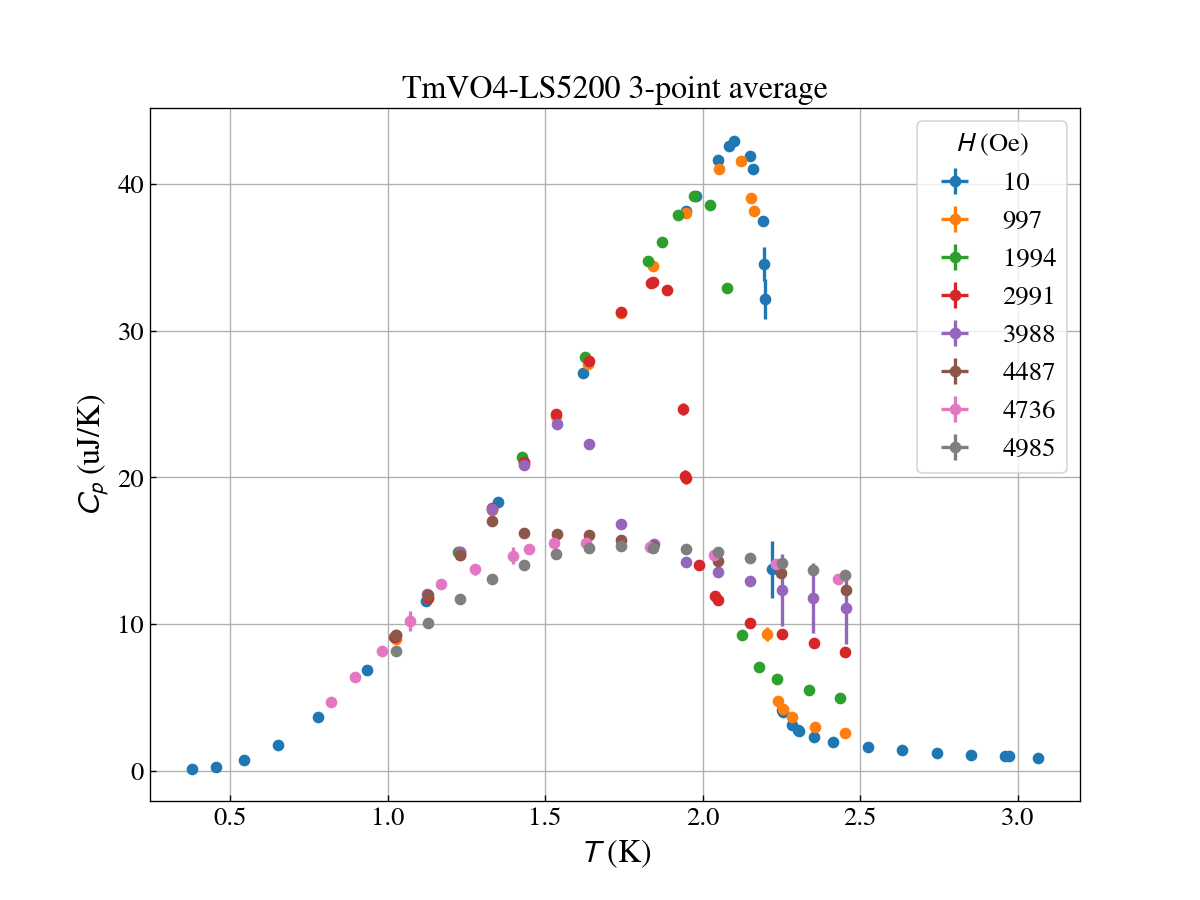

0 10.0
0 997.0
0 1994.0
0 2991.0
0 3988.0
0 4487.0
0 4736.0
0 4985.0


<IPython.core.display.Javascript object>


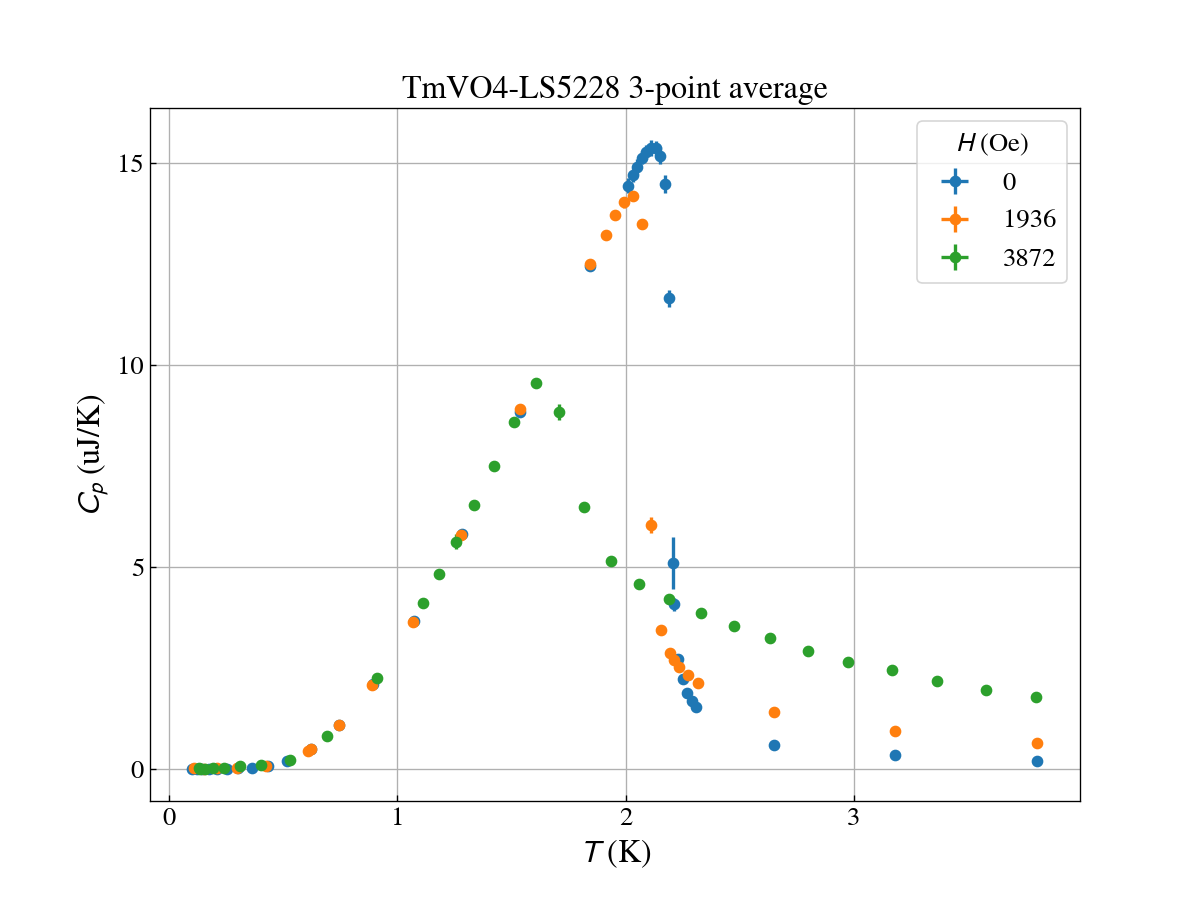

1 0.0
1 1936.0
1 3872.0


In [24]:
for idx in range(Nsamples):
    fig, ax = plt.subplots()
    cp_plot_settings(ax)
    plt.title(''.join([samples[idx], ' 3-point average']))
    for uh in uhcp[idx]:
        print(idx, uh)
        cpmhsel = np.where(np.round(Hm_inferred[idx])==uh)[0]
        plt.errorbar(Tm[idx].iloc[cpmhsel], Cpm[idx].iloc[cpmhsel], xerr=Tsd[idx].iloc[cpmhsel], yerr=CpmErr[idx].iloc[cpmhsel], 
                     marker='.', lw=0, elinewidth=2, label=round(uh))
    plt.legend(title=r'$H$ (Oe)')

#### First derivative of data

In [20]:
for var in ['H1m', 'H1m_inferred', 'T1m', 'T1sd', 'T1mErr', 'd1Cpdf', 'd1TCpm', 'd1TCpmErr', 'pbcp', 'pbcp_dict',
            'H1m_', 'H1m_inferred_', 'T1m_', 'T1sd_', 'T1mErr_', 'd1Cpdf', 'd1TCpm_', 'd1TCpmErr_',
            'H1m_interp', 'H1m_inferred_interp', 'T1m_interp', 'T1sd_interp', 'd1TCpm_interp', 'd1TCpmErr_interp',
            'Tmin', 'Tmax', 'interp']:
    exec(f'{var} = [None]*Nsamples')

In [31]:
T1m_interp[idx]

array([0.1016735 , 0.13905786, 0.17644223, 0.21382659, 0.25121095,
       0.28859532, 0.32597968, 0.36336405, 0.40074841, 0.43813278,
       0.47551714, 0.5129015 , 0.55028587, 0.58767023, 0.6250546 ,
       0.66243896, 0.69982333, 0.73720769, 0.77459205, 0.81197642,
       0.84936078, 0.88674515, 0.92412951, 0.96151388, 0.99889824,
       1.03628261, 1.07366697, 1.11105133, 1.1484357 , 1.18582006,
       1.22320443, 1.26058879, 1.29797316, 1.33535752, 1.37274188,
       1.41012625, 1.44751061, 1.48489498, 1.52227934, 1.55966371,
       1.59704807, 1.63443243, 1.6718168 , 1.70920116, 1.74658553,
       1.78396989, 1.82135426, 1.85873862, 1.89612299, 1.93350735,
       1.97089171, 2.00827608, 2.04566044, 2.08304481, 2.12042917,
       2.15781354, 2.1951979 , 2.23258226, 2.26996663, 2.30735099,
       2.34473536, 2.38211972, 2.41950409, 2.45688845, 2.49427281,
       2.53165718, 2.56904154, 2.60642591, 2.64381027, 2.68119464,
       2.718579  , 2.75596337, 2.79334773, 2.83073209, 2.86811

In [42]:
for idx in range(Nsamples):
    Tmax[idx] = max(Tm[idx])
    Tmin[idx] = min(Tm[idx])
    for var in ['H1m_', 'H1m_inferred_', 'T1m_', 'T1sd_', 'd1TCpm_', 'd1TCpmErr_']:
        exec(f'{var}[idx] = [None]*len(uhcp[idx])')

    for var in ['interp', 'H1m_interp', 'H1m_inferred_interp', 'T1sd_interp', 'd1TCpm_interp', 'd1TCpmErr_interp']:
        exec(f'{var}[idx] = {{}}')

    T1m_interp[idx] = pd.Series(np.linspace(Tmin[idx], Tmax[idx], 100), name='T (K)')# x data for interpolation

    for ih, uh in enumerate(uhcp[idx]):
        cpmhsel = Hm_inferred[idx].round()==uh
        T1m_[idx][ih] = Tm[idx].where(cpmhsel)
        d1TCpm_[idx][ih] = Cpm[idx].where(cpmhsel).diff()/Tm[idx].where(cpmhsel).diff()# first derivative of the heat capacity data
        d1TCpmErr_[idx][ih] = CpmErr[idx].where(cpmhsel).rolling(2).sum()# error on 1st derivative; the contribution from Tsd[idx] is ignored because it is negligible
        T1m_[idx][ih] = Tm[idx].where(cpmhsel).rolling(2).mean()# mean temperature for plotting the first derivative of the heat capacity data
        H1m_[idx][ih] = Hm[idx].where(cpmhsel).rolling(2).mean()# mean magnetic field for saving the critical temperature extracted from Cp data
        H1m_inferred_[idx][ih] = Hm_inferred[idx].where(cpmhsel).rolling(2).mean()# mean magnetic field for saving the critical temperature extracted from Cp data
        T1sd_[idx][ih] = Tsd[idx].where(cpmhsel).rolling(2).sum()/np.sqrt(2)# error on mean temperature
        
        interp[idx][uh] = interp1d(T1m_[idx][ih], d1TCpm_[idx][ih], fill_value='extrapolate')
        d1TCpm_interp[idx][uh] = -interp[idx][uh](T1m_interp[idx])# compute interpolated Cp data

    for var in ['H1m', 'H1m_inferred', 'T1m', 'T1sd', 'd1TCpm', 'd1TCpmErr']:
#             print(var)
        exec(f'{var}[idx] = pd.concat([{var}_[idx][ih][~{var}_[idx][ih].isna()] for ih in range(len(uhcp[idx]))])')

#     d1TCpm[idx].rename('1st der. Cp (uJ/K^2)', inplace=True)
#     d1TCpmErr[idx].rename('1st der. Cp Err. (uJ/K^2)', inplace=True)
#     H1m_inferred[idx].rename('H_corrected (Oe)', inplace=True)
#     T1sd[idx].rename('Sample Temp Std. (K)', inplace=True)

#     d1Cpdf[idx] = pd.concat([H1m_inferred[idx], T1m[idx], T1sd[idx], d1TCpm[idx], d1TCpmErr[idx]], axis=1)
    d1Cpdf[idx] = pd.concat([T1m_interp[idx], pd.DataFrame(d1TCpm_interp[idx])], axis=1)

d1Cpdf[idx]

T (K)       0.0    1936.0      3872.0
0   0.101673  0.304702  0.059130  105.539436
1   0.139058 -0.062212  0.023727   14.390263
2   0.176442 -0.031222 -0.011676   -0.153606
3   0.213827 -0.054799 -0.069485    0.013886
4   0.251211 -0.069304 -0.130615   -0.625992
..       ...       ...       ...         ...
95  3.653188       NaN       NaN    0.867613
96  3.690572       NaN       NaN         NaN
97  3.727957       NaN       NaN         NaN
98  3.765341       NaN       NaN         NaN
99  3.802726       NaN       NaN         NaN

[100 rows x 4 columns]

In [43]:
d1Cpdf[0]

T (K)      10.0      997.0     1994.0    2991.0     3988.0     4487.0  \
0   0.379798 -0.976659 -16.368925 -17.307613  9.488929 -18.676197 -23.712400   
1   0.406908 -1.916611 -16.794224 -17.726821  8.123742 -19.014814 -23.829848   
2   0.434017 -2.856564 -17.219524 -18.146029  6.758556 -19.353432 -23.947296   
3   0.461126 -3.796517 -17.644823 -18.565236  5.393369 -19.692049 -24.064744   
4   0.488236 -4.736470 -18.070122 -18.984444  4.028183 -20.030666 -24.182192   
..       ...       ...        ...        ...       ...        ...        ...   
95  2.955187  0.934419        NaN        NaN       NaN        NaN        NaN   
96  2.982297  0.901666        NaN        NaN       NaN        NaN        NaN   
97  3.009406  0.868913        NaN        NaN       NaN        NaN        NaN   
98  3.036515       NaN        NaN        NaN       NaN        NaN        NaN   
99  3.063625       NaN        NaN        NaN       NaN        NaN        NaN   

       4736.0     4985.0  
0  -24.930139 -34.960938  
1  -24.770369 -34.329375  
2  -24.610600 -33.697812  
3  -24.450831 -33.066249  
4  -24.291062 -32.434686  
..        ...        ...  
95        NaN        NaN  
96        NaN        NaN  
97        NaN        NaN  
98        NaN        NaN  
99        NaN        NaN  

[100 rows x 9 columns]

In [ ]:
idx = 1
Tm[idx].diff()/2
T1sd[idx].rename('Sample Temp Std (K)')
d1TCpm[idx]
H1m[idx]

In [35]:
os.chdir(r'C:\Users\Pierre\Desktop\Postdoc\TmVO4\TmVO4_summary_figures\TmVO4_phase_diagram_Cp_MCE\TmVO4_phase_boundary_data')
print(os.getcwd())

C:\Users\Pierre\Desktop\Postdoc\TmVO4\TmVO4_summary_figures\TmVO4_phase_diagram_Cp_MCE\TmVO4_phase_boundary_data


#### Extract phase boundary from derivative of Cp

In [45]:
for idx in range(Nsamples):
    pbcp_dict[idx] = {}
    for key in ['Hc (Oe)', 'Hc_inferred', 'Tc', 'Tc_Err (K)', 'min(dCp/dT) (uJ/K^2)']:
        pbcp_dict[idx][key] = [None]*len(uhcp[idx])

    for ih, uh in enumerate(uhcp[idx]):
        cpmhsel = np.logical_and(Hm_inferred[idx].round()==uh, T1m[idx]>1.)
        T1m_ = T1m[idx].where(cpmhsel)
        H1m_ = H1m[idx].where(cpmhsel)
        H1m_inferred_ = H1m_inferred[idx].where(cpmhsel)
        d1TCpm_ = d1TCpm[idx].where(cpmhsel)
        T1sd_ = T1sd[idx].where(cpmhsel)

        pbcp_dict[idx]['Hc (Oe)'][ih] = H1m_.loc[d1TCpm_.idxmin()]
        pbcp_dict[idx]['Hc_inferred'][ih] = H1m_inferred_.loc[d1TCpm_.idxmin()]#pbcp_dict[idx]['Hc (Oe)'][ih]*mce_data[idx]['rhc'][0]
        pbcp_dict[idx]['Tc'][ih] = T1m_.loc[d1TCpm_.idxmin()]

        # Error on transition temperature is the sum of:
        # - the standard deviation in the measurement of the temperature of all datapoints measured at the same setpoint and averaged together
        # - half of the difference between the temperature of the min of the 1st derivative of heat capacity and that of the nearest datapoint
        pbcp_dict[idx]['Tc_Err (K)'][ih] = T1sd_.loc[d1TCpm_.idxmin()] +\
        abs(T1m[idx].iloc[d1TCpm_.argmin()-1]-T1m[idx].iloc[d1TCpm_.argmin()])/2#
#         pbcp_dict[idx]['Tc_Err (K)'][ih] = T1sd_.loc[d1TCpm_.idxmin()] + abs(T1mErr_.loc[d1TCpm_.idxmin()])# Yields weird results for some datapoints

        pbcp_dict[idx]['min(dCp/dT) (uJ/K^2)'][ih] = d1TCpm_.min()

    pbcp[idx] = pd.DataFrame(pbcp_dict[idx])
    
pbcp[0]

Hc (Oe)  Hc_inferred        Tc  Tc_Err (K)  min(dCp/dT) (uJ/K^2)
0     9.997     9.967009  2.206189    0.016295           -866.104804
1   999.985   996.985045  2.183091    0.018952           -726.102785
2  1999.979  1993.979063  2.101235    0.025813           -476.093552
3  3000.015  2991.014955  1.945551    0.025374           -224.626817
4  4000.022  3988.021934  1.690041    0.051775            -53.347850
5  4500.031  4486.530907  1.382348    0.051703             -8.132212
6  4750.087  4735.836739  2.330626    0.629023             -5.188803
7  5000.020  4985.019940  2.300649    0.052342             -4.704781

In [46]:
pbcp[0] = pbcp[0].loc[:5].copy()

<IPython.core.display.Javascript object>


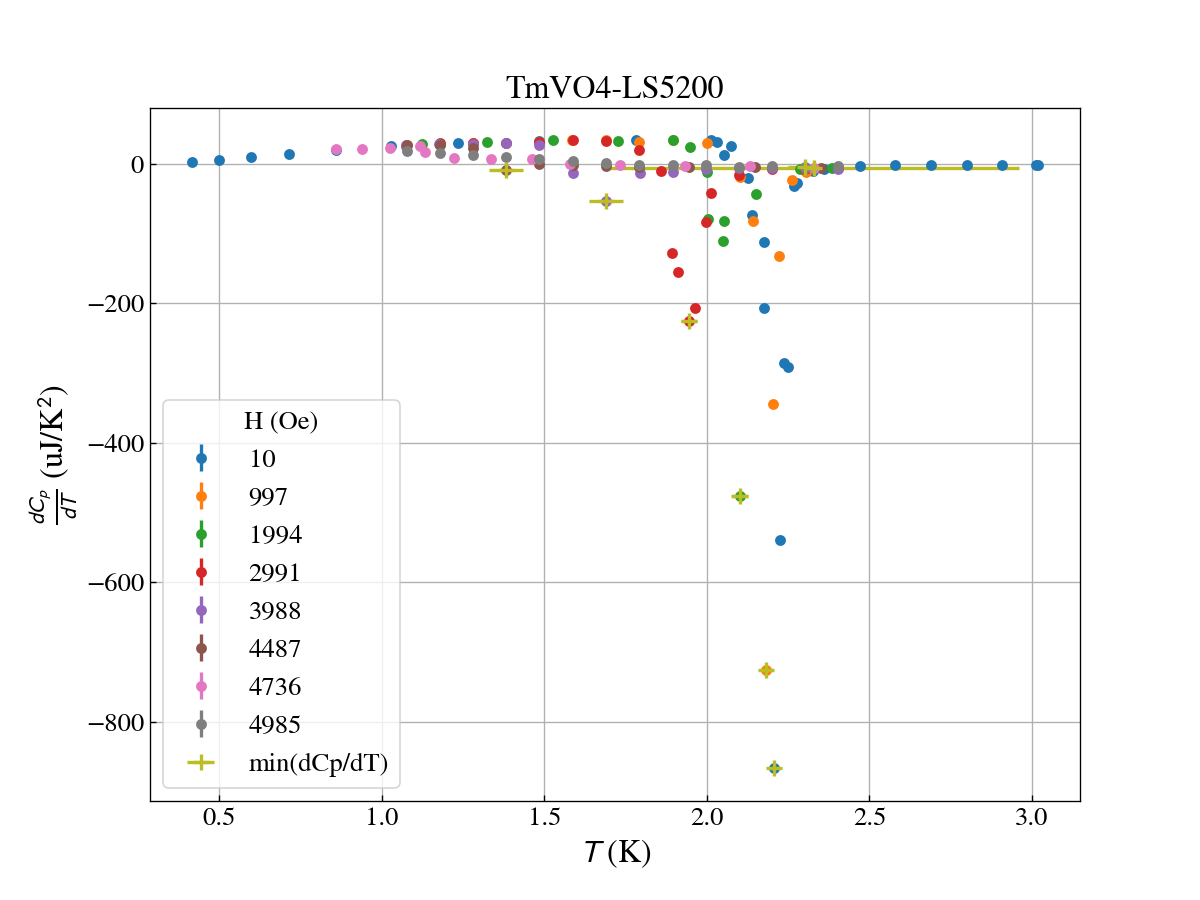

<IPython.core.display.Javascript object>


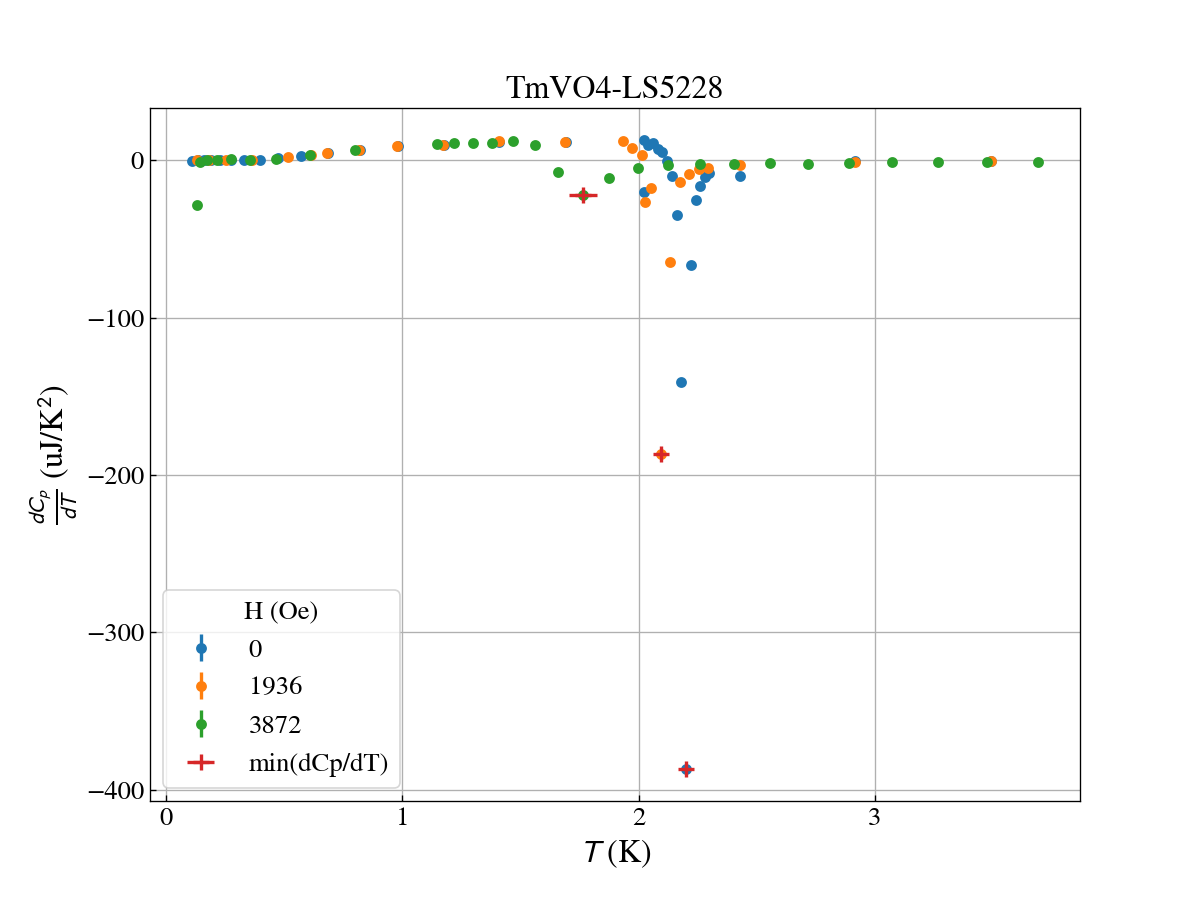

In [47]:
for idx in range(Nsamples):
    fig, ax = plt.subplots()
    cp_plot_settings(ax)
    plt.title(samples[idx])
    for uh in uhcp[idx]:
        cpmhsel = Hm_inferred[idx].round()==uh
        plt.errorbar(T1m[idx][cpmhsel], d1TCpm[idx][cpmhsel], yerr=d1TCpmErr[idx][cpmhsel], 
                     marker='.', ms=9, lw=0, elinewidth=2, label=round(uh))
    plt.errorbar(pbcp_dict[idx]['Tc'], pbcp_dict[idx]['min(dCp/dT) (uJ/K^2)'], 
                 xerr=pbcp_dict[idx]['Tc_Err (K)'], marker='+', lw=0, elinewidth=2, label='min(dCp/dT)')
    ax.set_ylabel(r'$\frac{dC_p}{dT}$ (uJ/K$^2$)')
    plt.legend(title='H (Oe)')

### Plot MCE data

<IPython.core.display.Javascript object>


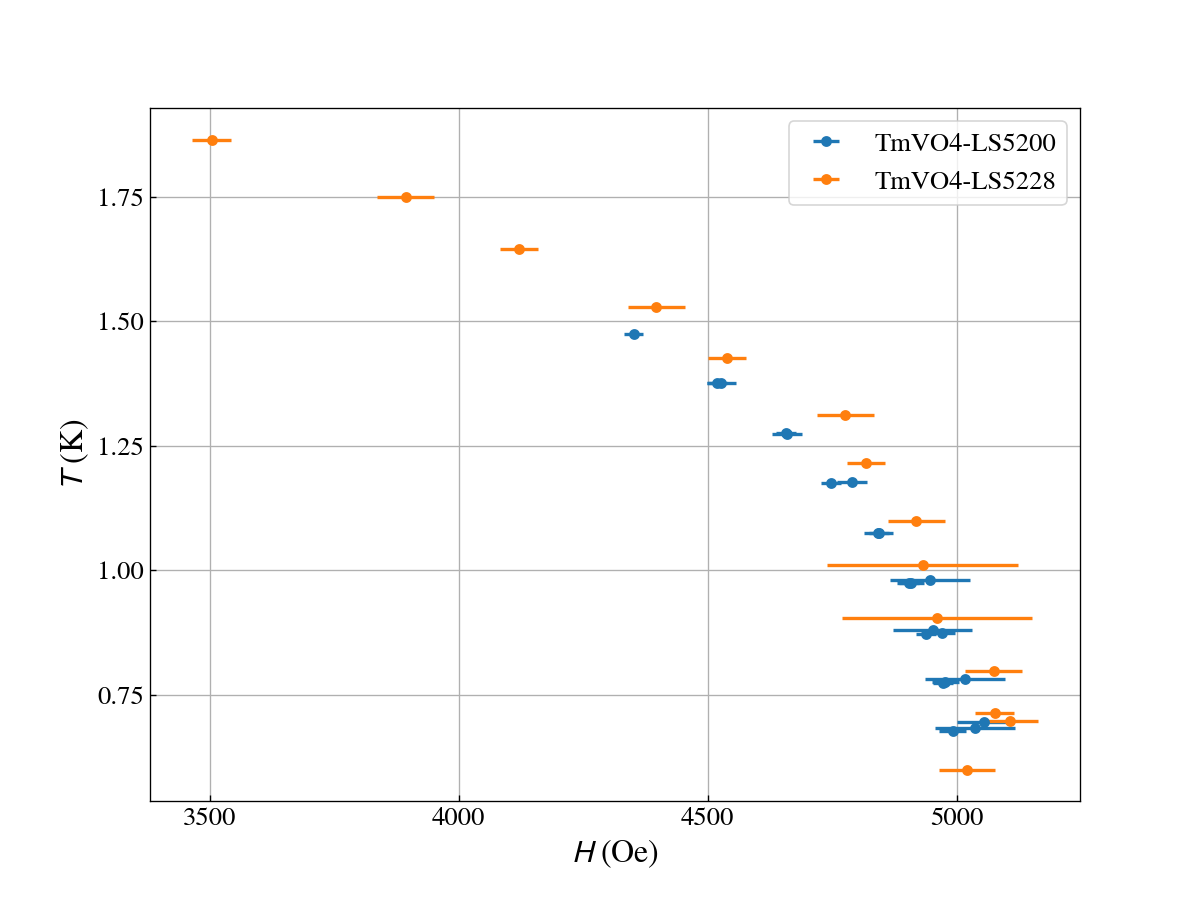

In [48]:
fig, ax = plt.subplots()
for idx in range(Nsamples):
    plt.errorbar(mce_data[idx]['Hc_inferred'], mce_data[idx]['Tc'], xerr=mce_data[idx]['dHc'], 
                 marker='.', ms=9, lw=0, elinewidth=2, label=f'{samples[idx]}')
ax.set_xlabel(r'$H$ (Oe)')
ax.set_ylabel(r'$T$ (K)')
ax.locator_params(nbins=6)
plt.legend()

### Full phase boundary

In [49]:
pb = [None]*Nsamples
for idx in range(Nsamples):
    mce_data[idx]['Tc_Err (K)'] = 0
    pbcp[idx]['dHc'] = 0
    # Concatenate Cp and MCE data, keeping only common columns
    pb[idx] = pd.concat([pbcp[idx], mce_data[idx]], join='inner')
#     pb[idx]['rTc_Err'] = pb[idx]['Tc_Err (K)']/pb[idx]['Tc']
#     pb[idx]['rHc_Err'] = pb[idx]['dHc']/pb[idx]['Hc_inferred']
    # Compute total relative error on x and y data as sqrt(xerr^2 + yerr^2)
    pb[idx]['rErr'] = np.sqrt((pb[idx]['Tc_Err (K)']/pb[idx]['Tc'])**2 + (pb[idx]['dHc']/pb[idx]['Hc_inferred'])**2)

In [50]:
pb[0]

Hc_inferred        Tc  Tc_Err (K)        dHc      rErr
0      9.967009  2.206189    0.016295   0.000000  0.007386
1    996.985045  2.183091    0.018952   0.000000  0.008681
2   1993.979063  2.101235    0.025813   0.000000  0.012285
3   2991.014955  1.945551    0.025374   0.000000  0.013042
4   3988.021934  1.690041    0.051775   0.000000  0.030636
5   4486.530907  1.382348    0.051703   0.000000  0.037402
0   4971.321160  0.773508    0.000000  20.007623  0.004025
1   4937.753167  0.872783    0.000000  20.007623  0.004052
2   4904.802816  0.974800    0.000000  20.007623  0.004079
3   4844.039155  1.074363    0.000000  20.007623  0.004130
4   4747.377014  1.174873    0.000000  20.007623  0.004214
5   4657.356887  1.275230    0.000000  20.007623  0.004296
6   4518.755442  1.375687    0.000000  20.007623  0.004428
7   4350.850672  1.474509    0.000000  20.007623  0.004599
8   4842.612946  1.073877    0.000000  29.901441  0.006175
9   4789.955395  1.176073    0.000000  29.901441  0.006243
10  4658.576716  1.273921    0.000000  29.901441  0.006419
11  4527.264339  1.375070    0.000000  29.901441  0.006605
12  4991.772621  0.677301    0.000000  26.874503  0.005384
13  4976.874949  0.776107    0.000000  26.874503  0.005400
14  4969.762351  0.874471    0.000000  26.874503  0.005408
15  4907.352145  0.973715    0.000000  26.874503  0.005476
16  5036.760252  0.682412    0.000000  80.098866  0.015903
17  5015.593443  0.780758    0.000000  80.098866  0.015970
18  4951.115958  0.879322    0.000000  80.098866  0.016178
19  4946.572629  0.980300    0.000000  80.098866  0.016193
20  5054.471459  0.695271    0.000000  53.662061  0.010617

<IPython.core.display.Javascript object>


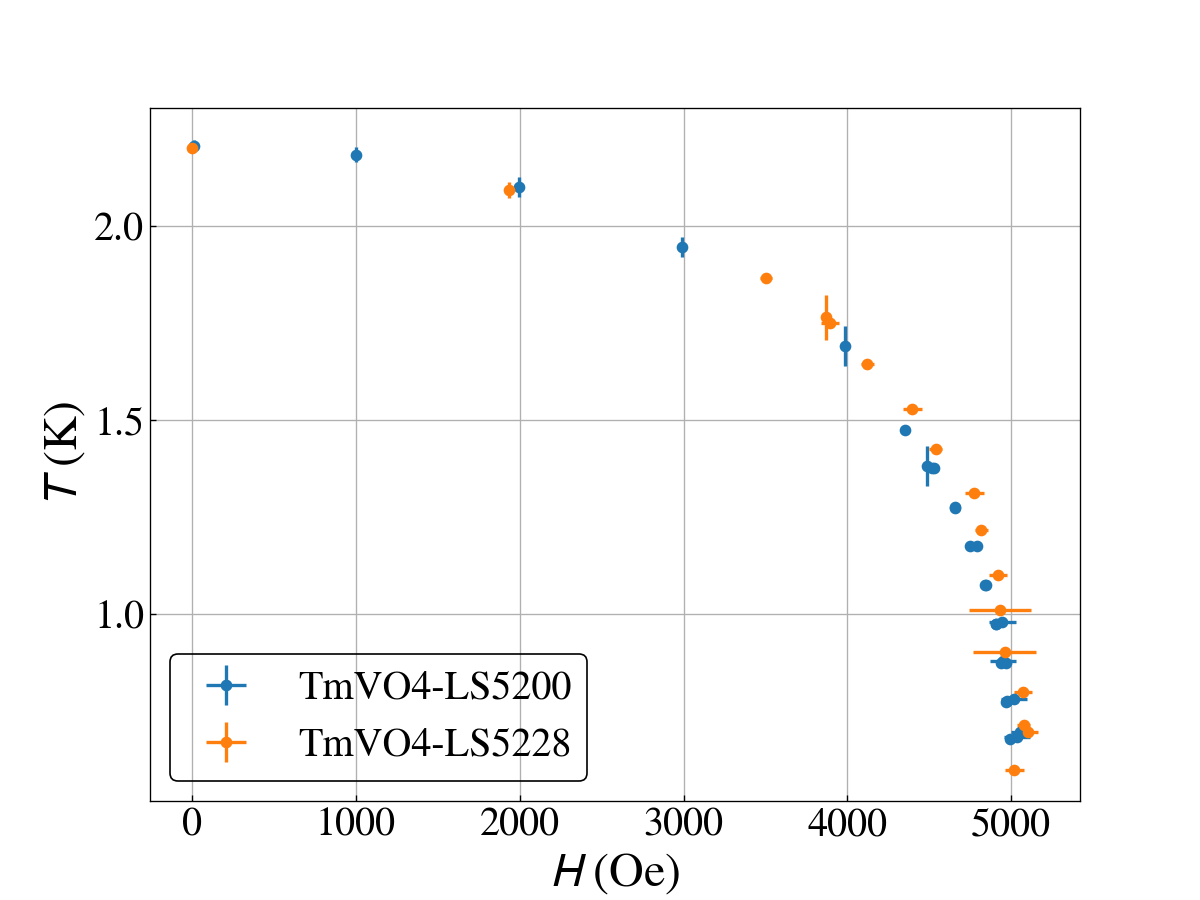

In [51]:
rcParams['font.family'] = 'STIXGeneral'
rcParams['mathtext.fontset'] = 'stixsans'
rcParams['font.size'] = 24
fig, ax = plt.subplots()
for idx in range(2):
    # Data
    sample = samples[idx]
    Hc_data = pb[idx]['Hc_inferred']
    Tc_data = pb[idx]['Tc']
    Tc_err = pb[idx]['Tc_Err (K)']
    Hc_err = pb[idx]['dHc']
#     err = pb[idx]['rErr']
    ax.errorbar(Hc_data, Tc_data, xerr=Hc_err, yerr=Tc_err, 
                marker='.', lw=0, elinewidth=2, label=f'{sample}')
    pb_plot_settings(ax)
    legend = ax.legend(edgecolor='black')
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((0, 0, 0, 0))

In [ ]:
os.chdir(r'C:\Users\Pierre\Desktop\Postdoc\TmVO4\TmVO4_summary_figures\TmVO4_phase_diagram_Cp_MCE\TmVO4_phase_boundary_PNG_figures')
print(sample, os.getcwd())
savePBFig = f'{str(today)}_{sample}_sc_fit.png'
plt.figure(num=9)
# plt.savefig(savePBFig, dpi=200, transparent=True, bbox_inches='tight')

## Fit data

### Fit with semi-classical model

In [27]:
def data_selection(data, temp_min=None, temp_max=None):
    if temp_max is None and temp_min is None:
        return np.ones(data.shape, dtype=bool)
    elif temp_max is None:
        return data>temp_min
    elif temp_min is None:
        return data<temp_max
    else:
        return np.logical_and(data>temp_min, data<temp_max)

In [28]:
def sc_tfim(x):
    return x/np.arctanh(x)

def sc_tfim_residual(params, x, data, eps_data=None):
    pvals = params.valuesdict()
    Tc = pvals['Tc']
    Hc = pvals['Hc']
    
    model = Tc*sc_tfim(x/Hc)

    if eps_data is None:
        yres = (data-model)
    else:
        yres = (data-model)/eps_data
    return yres[~np.isnan(yres)]

In [30]:
# Function to compute coefficient of determination R^2 from a combination of data and fit result
def rsquare(data, lmfit_result, eps_data=None, adjusted=False):
    fit = lmfit_result
    RSS = fit.chisqr# residual sum of squares
    
    # Total sum of squares
    if eps_data is None:
        TSS = ((data - data.mean())**2).sum()
    else:
        TSS = (((data - data.mean())/eps_data)**2).sum()
    
    rsqr = 1 - RSS/TSS# R^2
    
    if adjusted is True:
        # adjusted r^2
        adjrsqr = 1 - (RSS/TSS)*(fit.ndata-1)/(fit.nfree)# where fit.nfree = fit.ndata - fit.nvarys
        return rsqr, adjrsqr
    else:
        return rsqr

#### Fit plot functions

In [121]:
def plot_fitted_data(ax, data, data_selection, Hc_fit):
    Hc_data, Tc_data, Hc_err, Tc_err = data
    ax.errorbar(Hc_data[data_selection], Tc_data[data_selection], 
                xerr=Hc_err[data_selection], yerr=Tc_err[data_selection], 
                marker='.', lw=0, elinewidth=2, label='included')
    ax.errorbar(Hc_data[~data_selection], Tc_data[~data_selection], 
                xerr=Hc_err[~data_selection], yerr=Tc_err[~data_selection], 
                marker='x', ms=6, color='k', lw=0, elinewidth=2, label='excluded')
    ax.set_xlim([round(np.min(Hc_data)-2e2, -2), round(Hc_fit+2e2, -2)])
    ax.set_ylim([round(np.min(Tc_data)-.05, 1), round(np.max(Tc_data)+.05, 1)])
    ax.set_ylabel(r'$T$ (K)')

def plot_fit_residual(ax, data, data_selection, plot_excluded=True):
    Hc_data, fit_residual, Hc_err, Tc_err = data
    ax.errorbar(Hc_data[data_selection], fit_residual[data_selection], 
                xerr=Hc_err[data_selection], yerr=Tc_err[data_selection],
                marker='.', lw=0, elinewidth=2)
    if plot_excluded is True:
        ax.errorbar(Hc_data[~data_selection], fit_residual[~data_selection], 
                    xerr=Hc_err[~data_selection], yerr=Tc_err[~data_selection],
                    marker='x', ms=6, color='k', lw=0, elinewidth=2)
    ax.axhline(color='0.5', ls='--')#'0.5' is gray
    pb_plot_settings(ax)# see definition above
    ax.set_ylabel(r'$(T-T^{\mathrm{fit}})/T_{Q,0}$')
    ax.locator_params(axis='y', nbins=4)
    ax.yaxis.set_major_formatter('{x: .2f}')

def plot_rsqr(ax, data, title1=None, ylim_range=None):
    xdata, ydata = data
    ax.plot(xdata, ydata, '+', mew=2)
    ax.set_yscale('log')
    ax.set_ylabel(r'$1-\overline{{R}}\,^2$')
    ax.set_xlabel(r'$T^{\mathrm{fit}}_{\mathrm{cutoff}}$ (K)')
    if title1 is not None:
        ax.set_title(f'{title1}')
    else:
        ax.set_title('Goodness of fit vs cutoff temperature')
    if ylim_range is not None:
        ax.xaxis.set_ticks(np.arange(ylim_range[0]/10, (ylim_range[-1]+1)/10, 0.1))


#### Prepare fit

In [ ]:
# reset fontsize to 16
rcParams['font.size'] = 16

# Initialize fit parameters as lmfit's Parameters object
sc_params = Parameters()
sc_params.add('Tc', value=2.2, vary=True)

# Create list that will store fit results for data from each sample
sc_fit_list = [None]*Nsamples

In [100]:
# 1-out.chisqr/(((y-y.mean())/err)**2).sum()
# rsquare(y, out, eps_data=err, adjusted=True)

range(6, 24)

#### Perform fit and plot

<IPython.core.display.Javascript object>


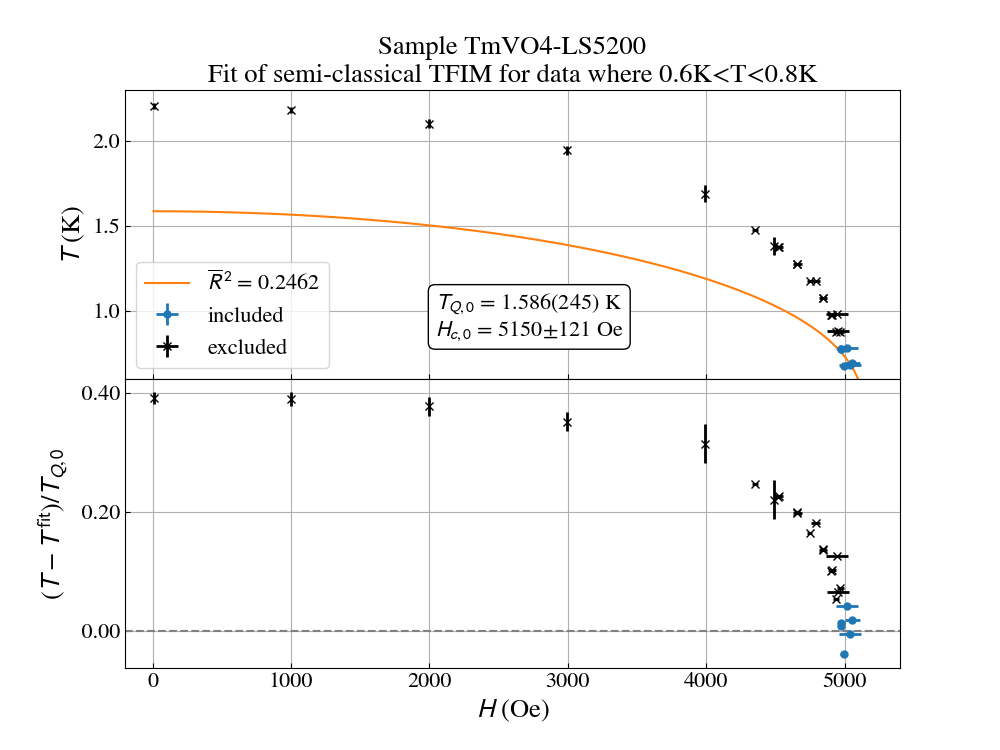

 Ndata:6; R^2:0.396924; adj-R^2:0.246156; Hc:5150.44; Hc_err:120.512; Tc:1.58618; Tc_err:0.245051;


<IPython.core.display.Javascript object>


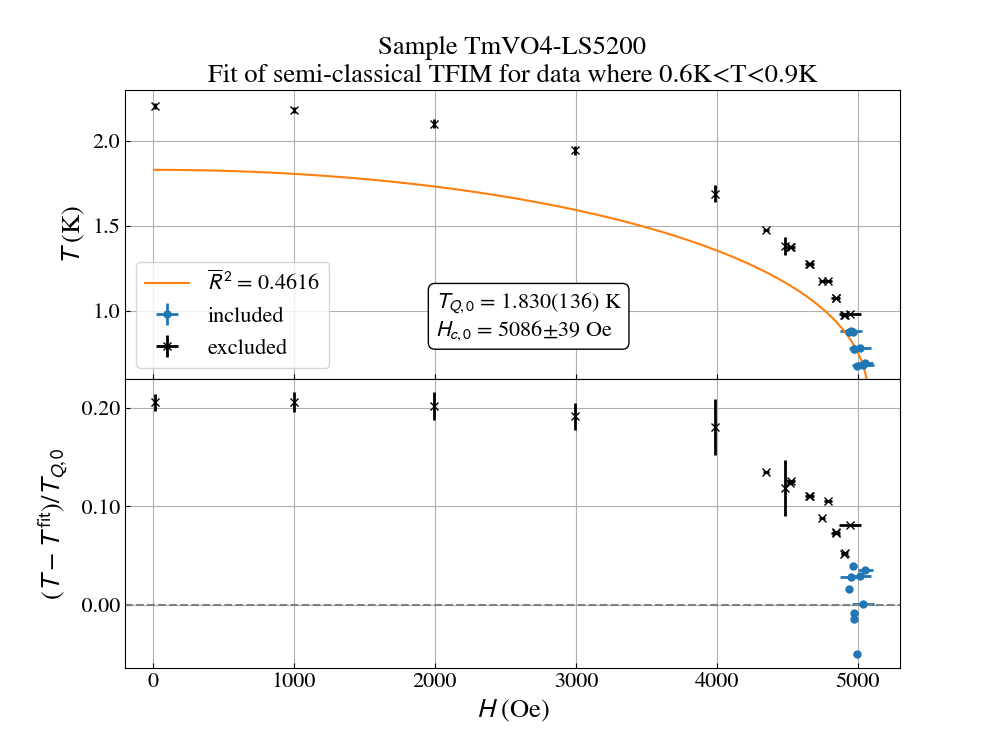

 Ndata:9; R^2:0.528914; adj-R^2:0.461616; Hc:5086.18; Hc_err:39.1344; Tc:1.8301; Tc_err:0.135556;


<IPython.core.display.Javascript object>


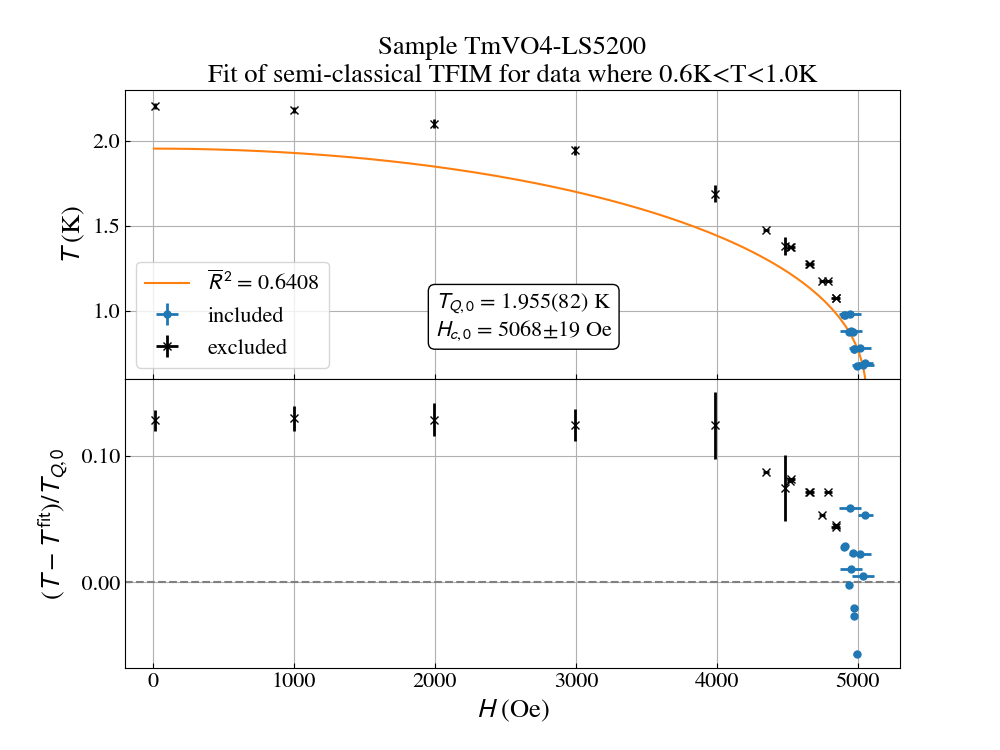

 Ndata:12; R^2:0.673493; adj-R^2:0.640842; Hc:5068.27; Hc_err:19.3449; Tc:1.95493; Tc_err:0.0824726;


<IPython.core.display.Javascript object>


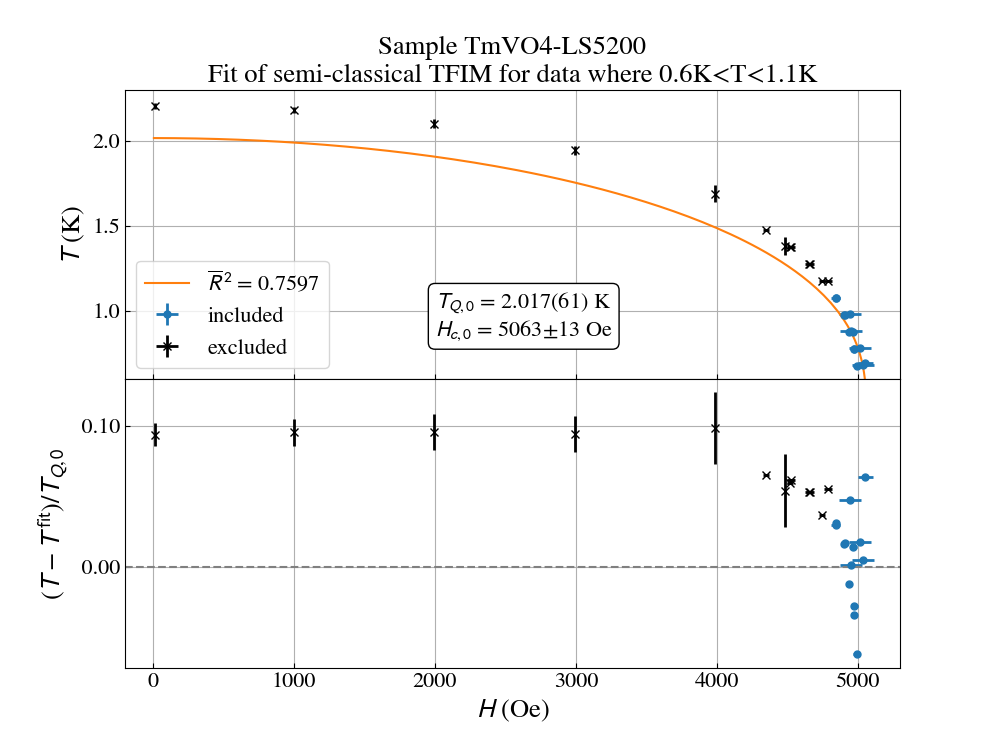

 Ndata:14; R^2:0.778145; adj-R^2:0.759657; Hc:5062.76; Hc_err:13.1255; Tc:2.01697; Tc_err:0.0611087;


<IPython.core.display.Javascript object>


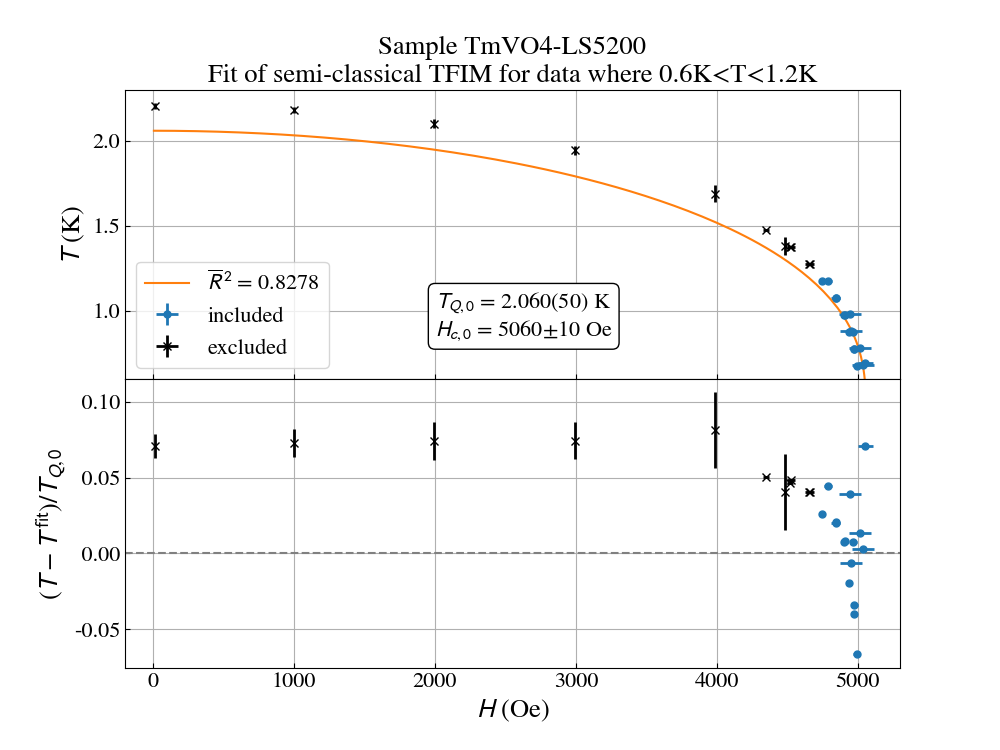

 Ndata:16; R^2:0.839277; adj-R^2:0.827797; Hc:5060.16; Hc_err:10.0239; Tc:2.0602; Tc_err:0.0495922;


<IPython.core.display.Javascript object>


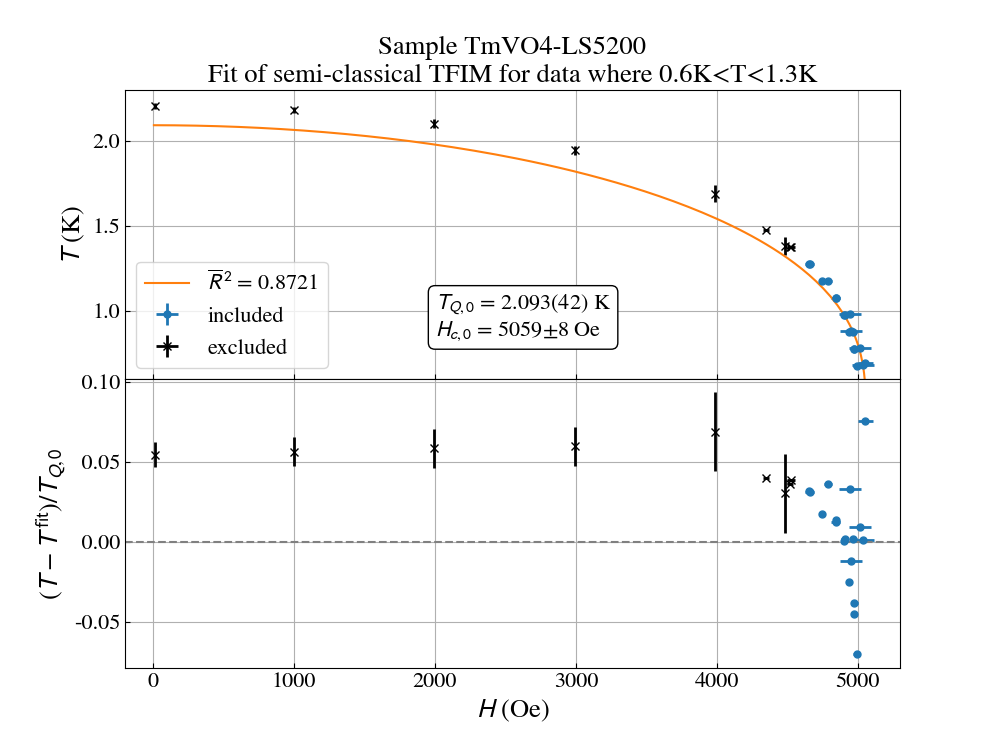

 Ndata:18; R^2:0.879597; adj-R^2:0.872072; Hc:5058.73; Hc_err:8.08956; Tc:2.09264; Tc_err:0.0419655;


<IPython.core.display.Javascript object>


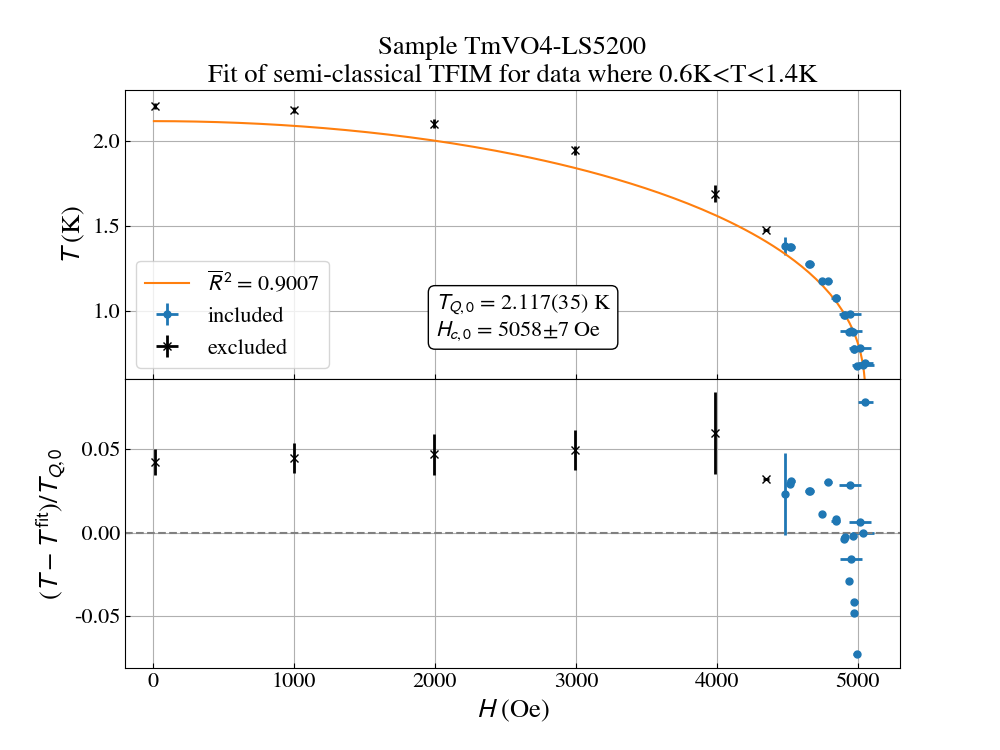

 Ndata:21; R^2:0.905709; adj-R^2:0.900746; Hc:5057.91; Hc_err:6.63719; Tc:2.11671; Tc_err:0.0354164;


<IPython.core.display.Javascript object>


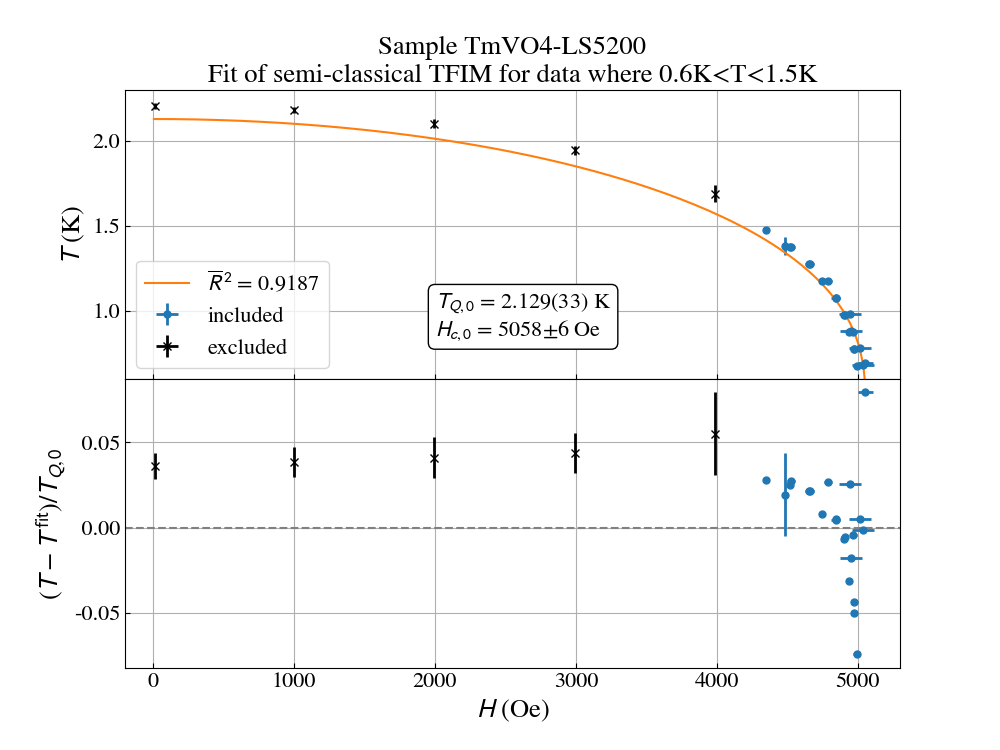

 Ndata:22; R^2:0.922615; adj-R^2:0.918746; Hc:5057.55; Hc_err:6.07638; Tc:2.1292; Tc_err:0.0327194;


<IPython.core.display.Javascript object>


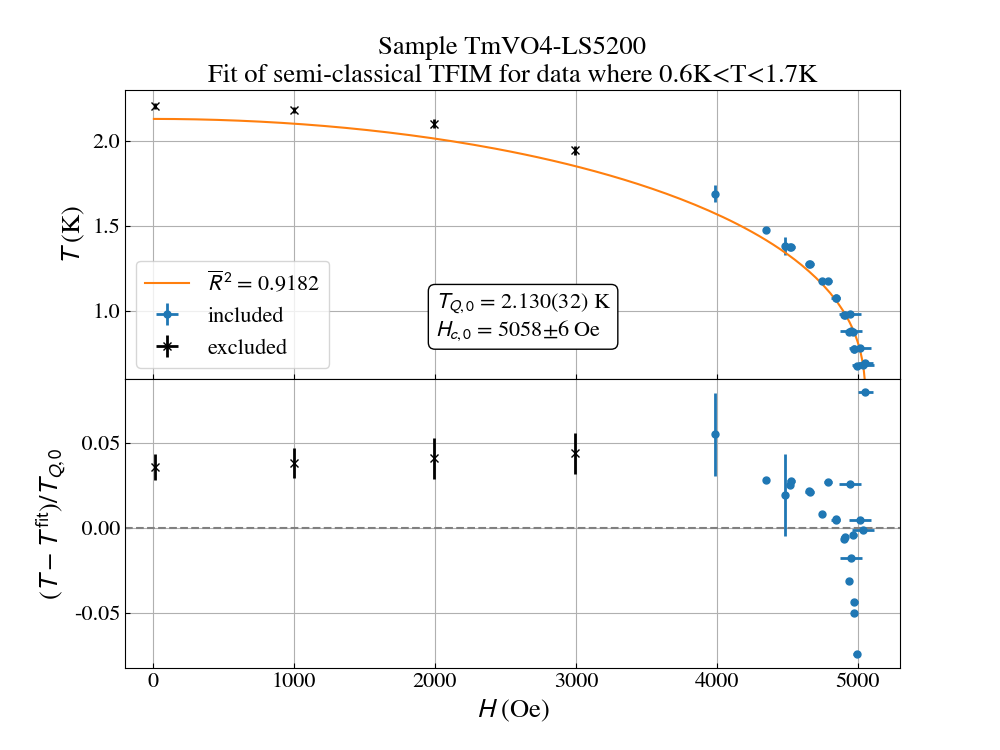

 Ndata:23; R^2:0.921893; adj-R^2:0.918174; Hc:5057.53; Hc_err:5.91762; Tc:2.12975; Tc_err:0.0319242;


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


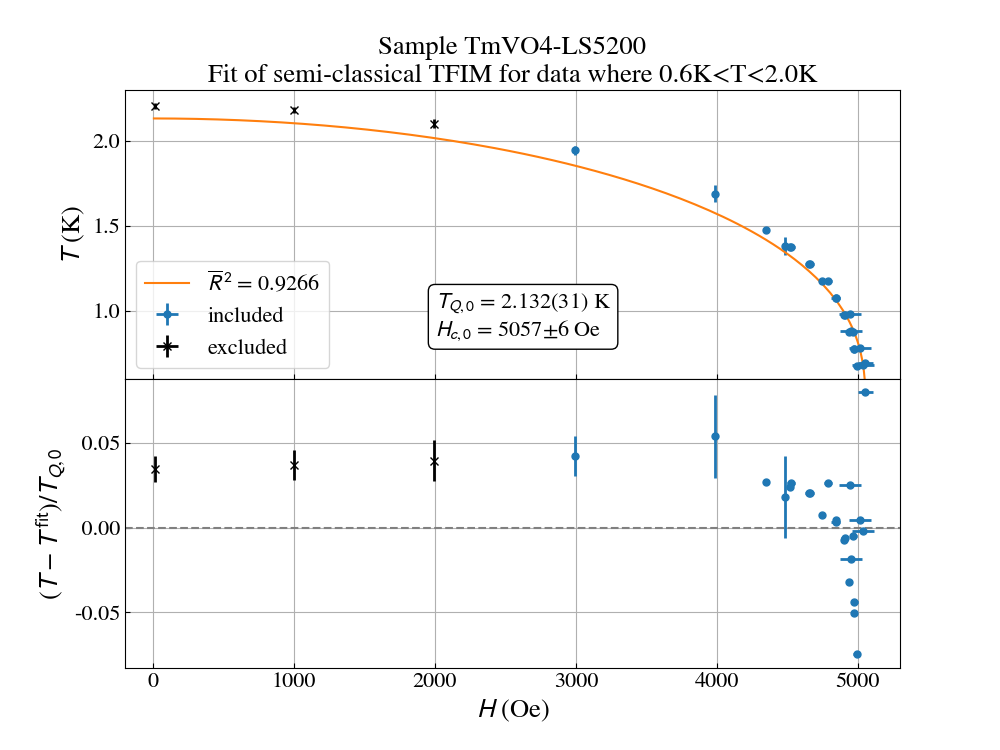

 Ndata:24; R^2:0.929786; adj-R^2:0.926594; Hc:5057.45; Hc_err:5.68648; Tc:2.13248; Tc_err:0.0308667;


<IPython.core.display.Javascript object>


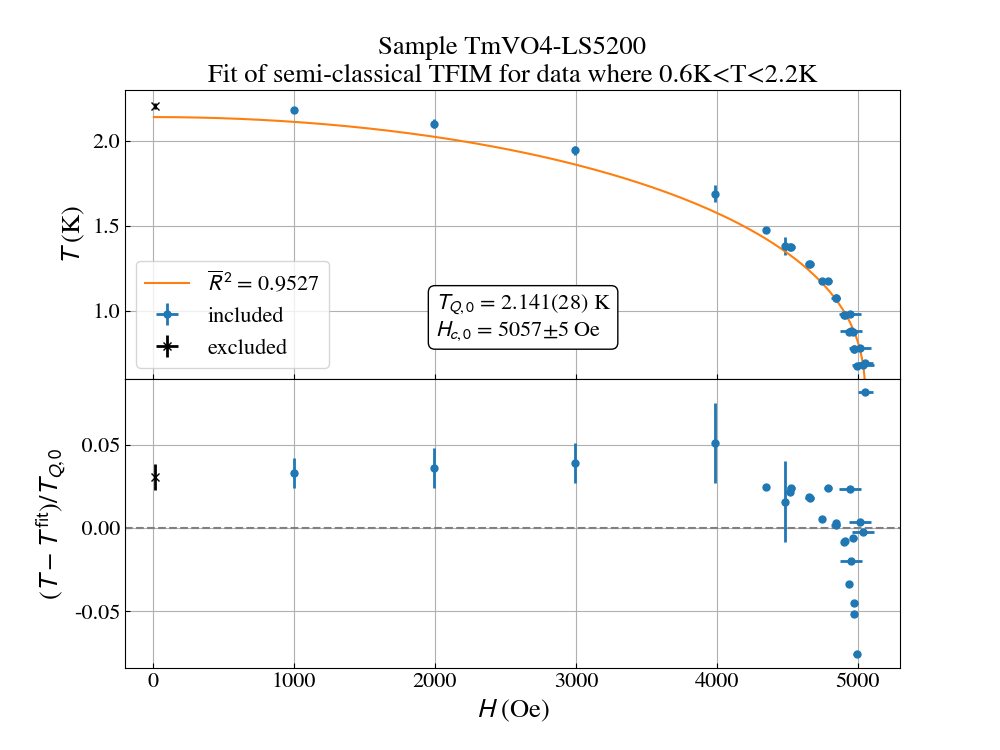

 Ndata:26; R^2:0.954626; adj-R^2:0.952736; Hc:5057.2; Hc_err:5.14748; Tc:2.14058; Tc_err:0.0281261;


<IPython.core.display.Javascript object>


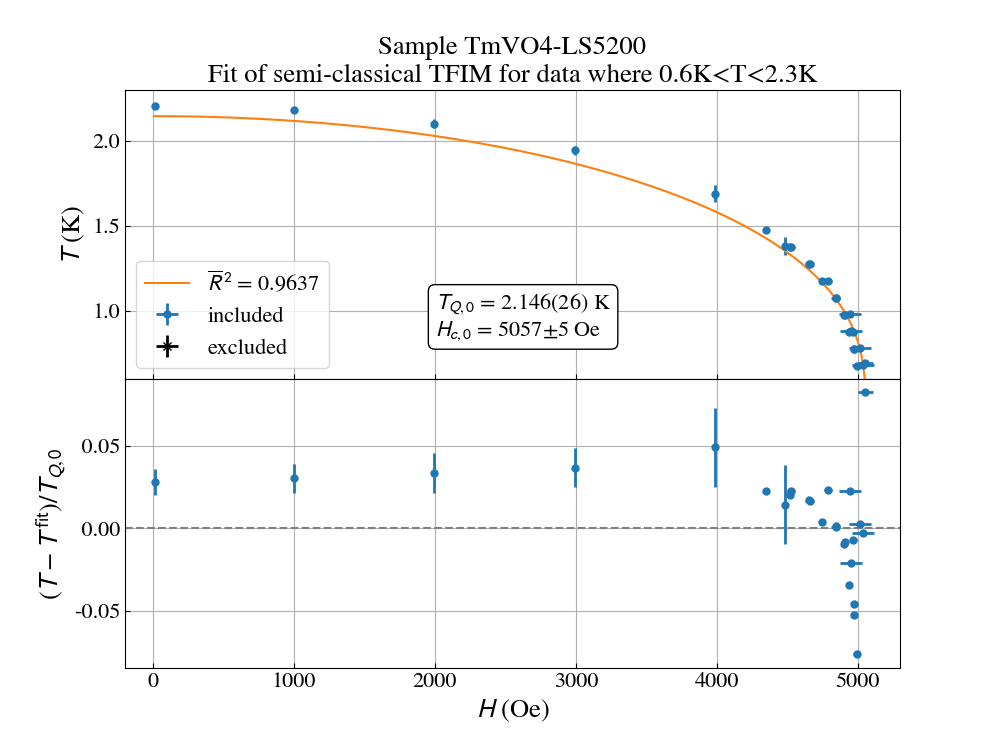

 Ndata:27; R^2:0.965091; adj-R^2:0.963694; Hc:5057.04; Hc_err:4.83858; Tc:2.14624; Tc_err:0.0263482;


<IPython.core.display.Javascript object>


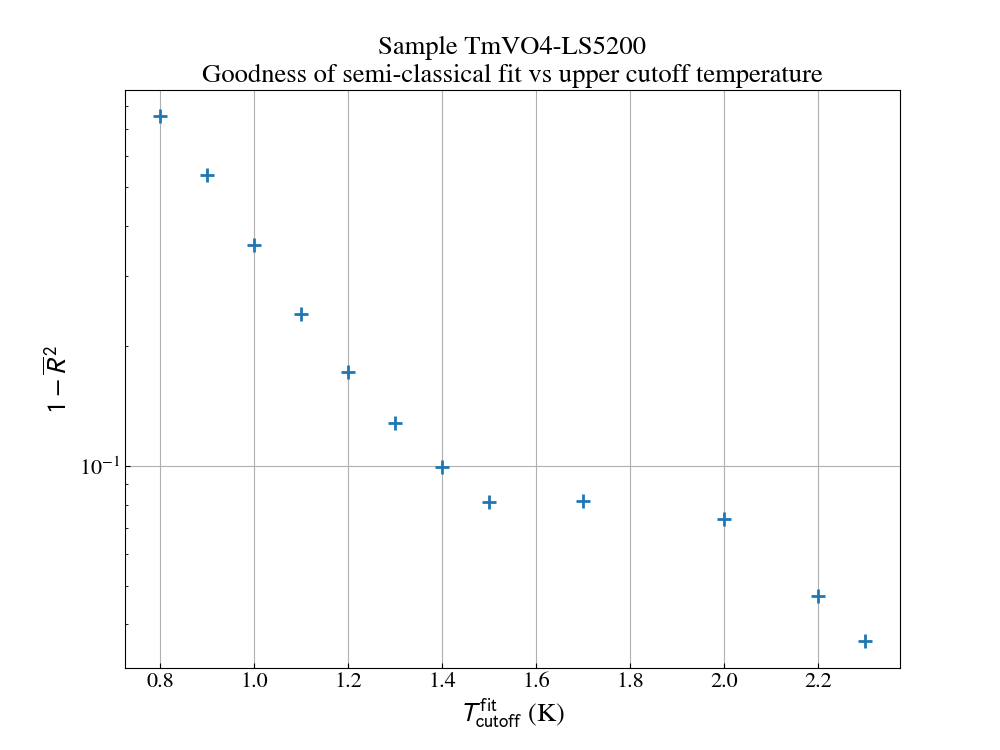

In [165]:
# Loop over samples
for idx in range(1):
    # Data
    sample = samples[idx]
    Hc_data = pb[idx]['Hc_inferred']
    Tc_data = pb[idx]['Tc']
    yerr = pb[idx]['Tc_Err (K)']
    xerr = pb[idx]['dHc']
    err = pb[idx]['rErr']
    
    # Initialize Hc parameter
    sc_params.add('Hc', value=5.3e3, min=max(Hc_data)*1.0001, vary=True)# *1.0001 to avoid divergence of the result when best fit parameter is at bound
    
    # Initialize dictionary to store fit results
    sc_fit_list[idx] = {}

    # Range of values to use as base temperature of data selection
    Tc_min = round(Tc_data.min()-.05,1)
    Tc_max = round(Tc_data.max()+.05,1)
    ylim_rng = range(round(10*Tc_min), round(10*Tc_max+1))# *10 because range only takes integer-like input
    sc_ylim = ylim_rng[:]# Subrange to loop over (mostly for test purposes)
    
    for ylim_idx, ylim10 in enumerate(sc_ylim):
        # Data selection for fit 
        ylim = ylim10/10# base temperature of fit is 1/10 of ylim10 (by construction of ylim_rng)
        cutoff = 'upper'
        ymin = {'lower':ylim, 'upper':Tc_min}
        ymax = {'lower':Tc_max, 'upper':ylim}
        ysel = data_selection(Tc_data, temp_min=ymin[cutoff], temp_max=ymax[cutoff])
        
        # If there are less than 5 data points
        # or if data selection is the same as in the previous iteration of the loop, skip to next iteration
        if len(ysel[ysel])<4 or ylim_idx>0 and np.array_equal(ysel, ysel_ref): continue
        ysel_ref = ysel# To compare data selection with that of next iteration
        
        # Perform fit of data using lmfit's minimize function
        try:
            out = minimize(sc_tfim_residual, sc_params, args=(Hc_data[ysel], Tc_data[ysel]), kws={'eps_data':err[ysel]})
        except ValueError as verr:
            print(verr)
            break

        # Extract fit parameters
        Tc_fit = out.params['Tc'].value
        Tc_fit_err = out.params['Tc'].stderr
        Hc_fit = out.params['Hc'].value
        Hc_fit_err = out.params['Hc'].stderr
        rsqr, adjrsqr = rsquare(Tc_data[ysel], out, eps_data=err[ysel], adjusted=True)
        
        # Store fit parameters
        sc_fit_list[idx][ylim] = {'Ndata':out.ndata, 'R^2':rsqr, 'adj-R^2':adjrsqr, 
                                  'Hc':Hc_fit, 'Hc_err':np.nan, 'Tc':Tc_fit, 'Tc_err':np.nan}
        if Hc_fit_err is not None:
            sc_fit_list[idx][ylim]['Hc_err'] = Hc_fit_err
            sc_fit_list[idx][ylim]['Tc_err'] = Tc_fit_err

        # Compute fit curve
        xfit = np.concatenate([np.logspace(-3,-2,10), np.linspace(.02,.96,95), 1-np.logspace(-1.5,-5)]) * Hc_fit
        yfit = Tc_fit * sc_tfim(xfit/Hc_fit)

        # Create figure + axes
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

        # Plot data + fit
        title = f'Fit of semi-classical TFIM for data where {ymin[cutoff]}K<T<{ymax[cutoff]}K'# Plot title
        plot_fitted_data(ax1, (Hc_data, Tc_data, xerr, yerr), ysel, Hc_fit)
        ax1.plot(xfit, yfit, label=f'$\overline{{R}}\,^2$ = {adjrsqr:.4f}')
        ax1.set_title(f'Sample {sample}\n{title}')
        ax1.legend()
        ax1.annotate(''.join([f'$T_{{Q,0}}$ = {Tc_fit:.3f}({sc_fit_list[idx][ylim]["Tc_err"]*1e3:.0f}) K\n',
                     f'$H_{{c,0}}$ = {Hc_fit:.0f}$\pm${sc_fit_list[idx][ylim]["Hc_err"]:.0f} Oe']), 
                     xy=(.4, .15), xycoords='axes fraction', 
                     bbox=dict(boxstyle='round', fc='w'))# add annotation

        # Plot residual
        fit_residual = sc_tfim_residual(out.params, Hc_data, Tc_data, eps_data=None)
        plot_fit_residual(ax2, (Hc_data, fit_residual/Tc_fit, xerr, yerr/Tc_fit), ysel)

        # Print fit parameters
        fit_prms = ''.join([f' {k}:{v:.6g};' for k, v in sc_fit_list[idx][ylim].items()])
        print(fit_prms)
        
    # Plot goodness of fit versus temperature cutoff 
    Tfit, Rsqr = zip(*[(ylim, 1-sc_fit_list[idx][ylim]['adj-R^2']) for ylim in sc_fit_list[idx].keys()])
    title_rsqr = f'Sample {sample}\nGoodness of semi-classical fit vs {cutoff} cutoff temperature'
    fig, ax = plt.subplots()
    plot_rsqr(ax, (Tfit, Rsqr), title1=title_rsqr)

C:\Users\Pierre\Desktop\Postdoc\TmVO4\TmVO4_heat-capacity\2017-07_TmVO4_Cp_MCE\2017-07-28--31\Massaic_MCE\Extracted_critical_fields\TmVO4-LS5200_Tc_vs_Hc_sc_fits


<IPython.core.display.Javascript object>


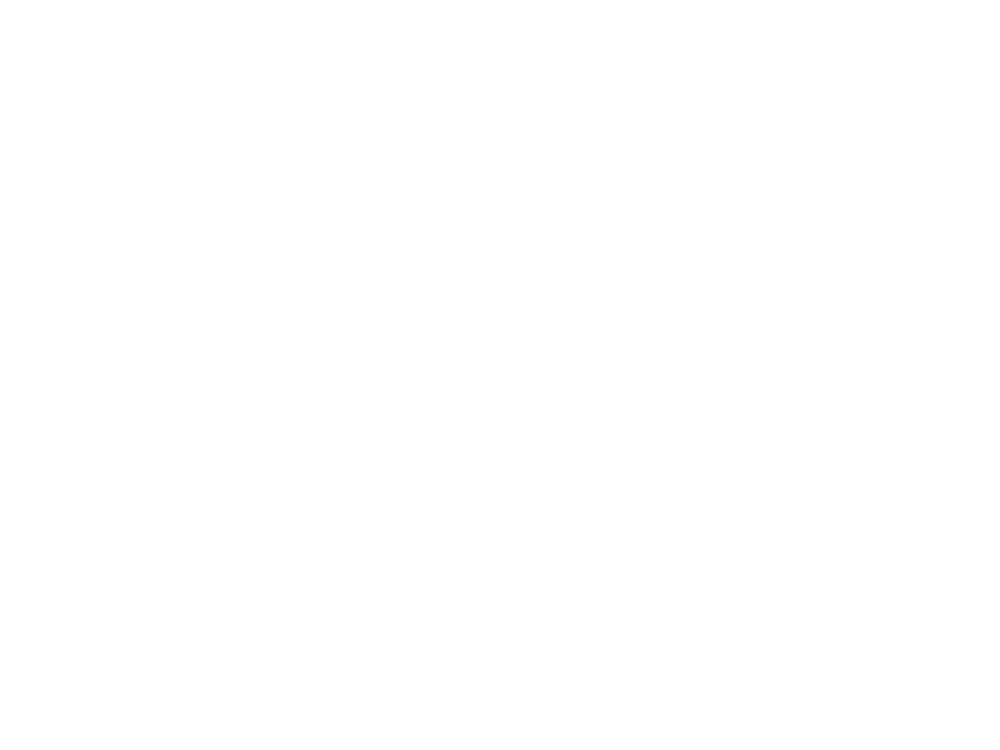

<IPython.core.display.Javascript object>


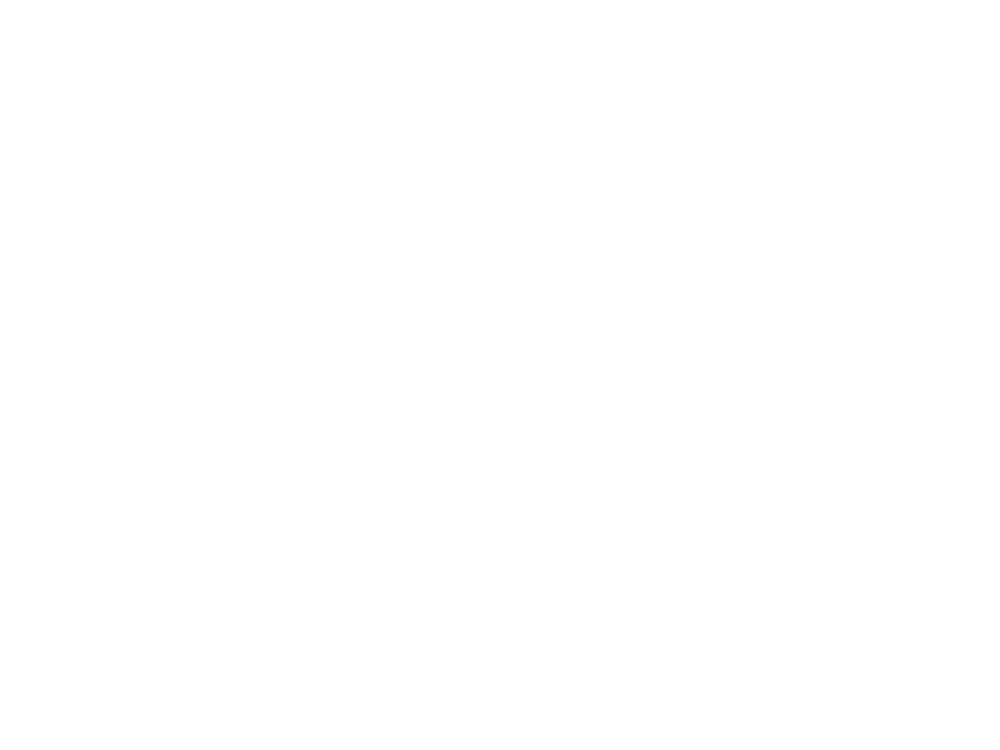

In [166]:
os.chdir(f'{mce_data_dir[sample]}/{sample}_Tc_vs_Hc_sc_fits')
print(os.getcwd())
saveFitFig = f'{str(today)}_{sample}_sc_fit_{cutoff}_cutoff.png'
saveRsqrFig = f'{str(today)}_{sample}_sc_fit_{cutoff}_cutoff_Rsqr.png'
plt.figure(num=61)
# plt.savefig(saveFitFig, dpi=200, bbox_inches='tight')
plt.figure(num=35)
# plt.savefig(saveRsqrFig, dpi=200, bbox_inches='tight')

### Log-log plot

<IPython.core.display.Javascript object>


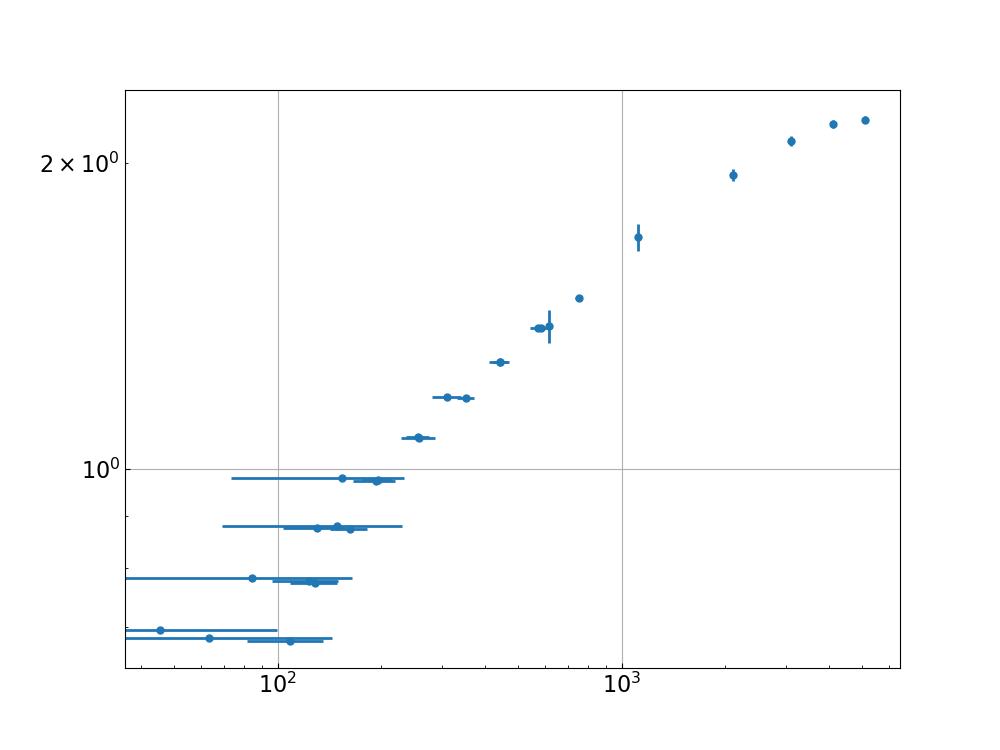

In [30]:
for idx in range(1):
    # Data
    sample = samples[idx]
    Hc_data = pb[idx]['Hc_inferred']
    Tc_data = pb[idx]['Tc']
    Tc_err = pb[idx]['Tc_Err (K)']
    Hc_err = pb[idx]['dHc']
    err = pb[idx]['rErr']

    ysel = Tc_data>0
    
    fig, ax = plt.subplots()
    ax.errorbar(5.1e3-Hc_data[ysel], Tc_data[ysel], 
                xerr=Hc_err[ysel], yerr=Tc_err[ysel], 
                marker='.', lw=0, elinewidth=2, label='included')
    ax.loglog()
#     ax.set_xlim(left=1e3)

### Fit with Rafael's predictions

In [167]:
def rmf_model(x, A, Hc, psi):
    return A*abs(Hc-x)**psi

def rmf_residual(params, x, y, weights=None):
    """Compute the residual for fit using Rafael M. Fernandes' theoretical predictions."""
    pvals = params.valuesdict()
    A = pvals['A']
    Hc = pvals['Hc']
    psi = pvals['psi']
    
    model = A*abs(Hc-x)**psi

    if weights is None:
        yres = (y-model)
    else:
        yres = (y-model)*weights
        
    return yres[~np.isnan(yres)]

In [169]:
rmf_fit_list = [None]*2
rmf_params = Parameters()
rmf_params.add('A', value=1)# arbitrary multiplying factor
rmf_params.add('Hc', value=5.2e3)# Critical field
Tc = 2.2# estimated Tc, for plotting the fit residual

ax2.get_yticks()
# ax2.yaxis.set_major_formatter(f'{yticks}')

array([-0.1 , -0.05,  0.  ,  0.05,  0.1 ])

#### Perform fit and plot
To do as of 2021-06-25
* Loop over ymin_rng to include lower temperature cutoff for fit with psi = 1/4

<IPython.core.display.Javascript object>


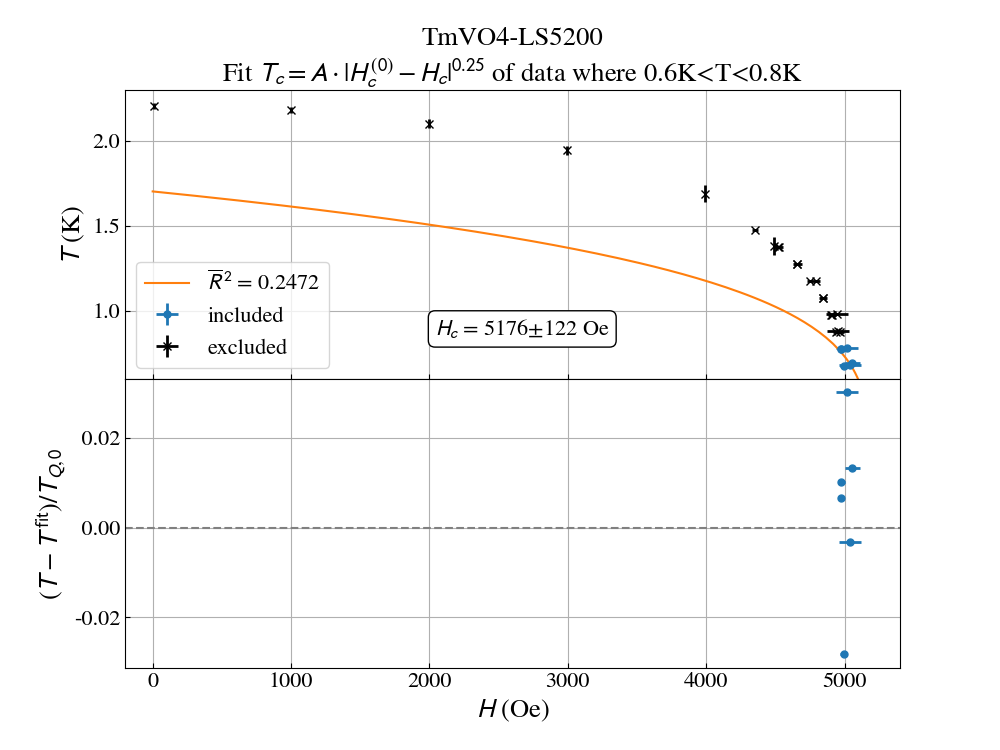

 Ndata:6; R^2:0.397743; adj-R^2:0.247179; Hc:5175.77; Hc_err:122.011; A:0.200763; A_err:0.0327977;


<IPython.core.display.Javascript object>


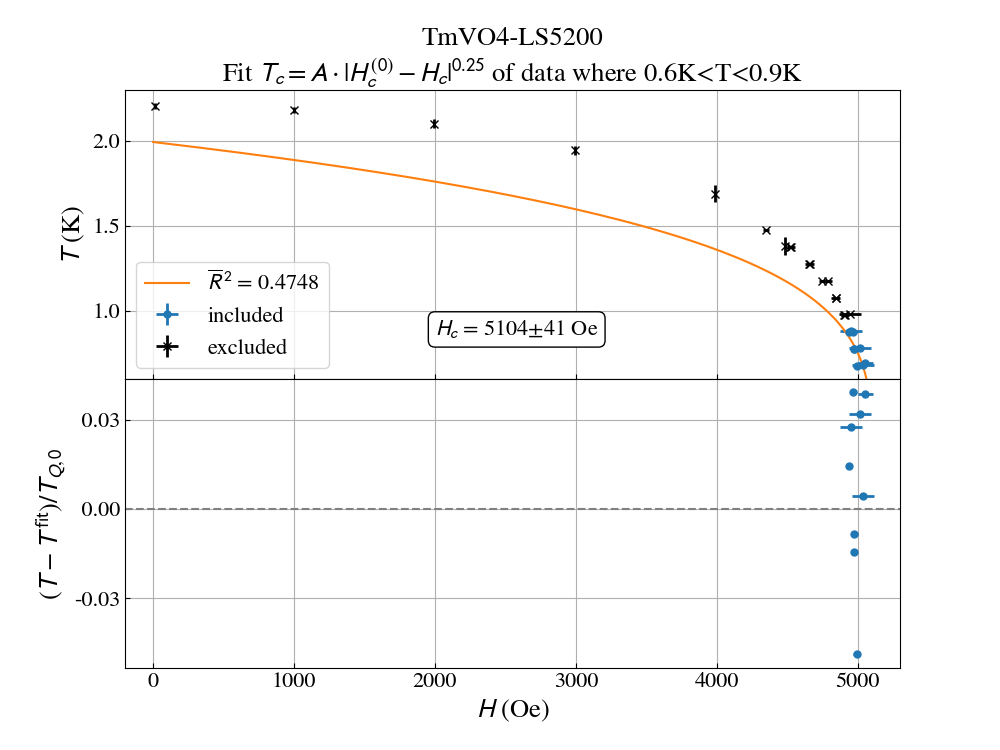

 Ndata:9; R^2:0.540474; adj-R^2:0.474827; Hc:5103.51; Hc_err:41.0056; A:0.235887; A_err:0.0195641;


<IPython.core.display.Javascript object>


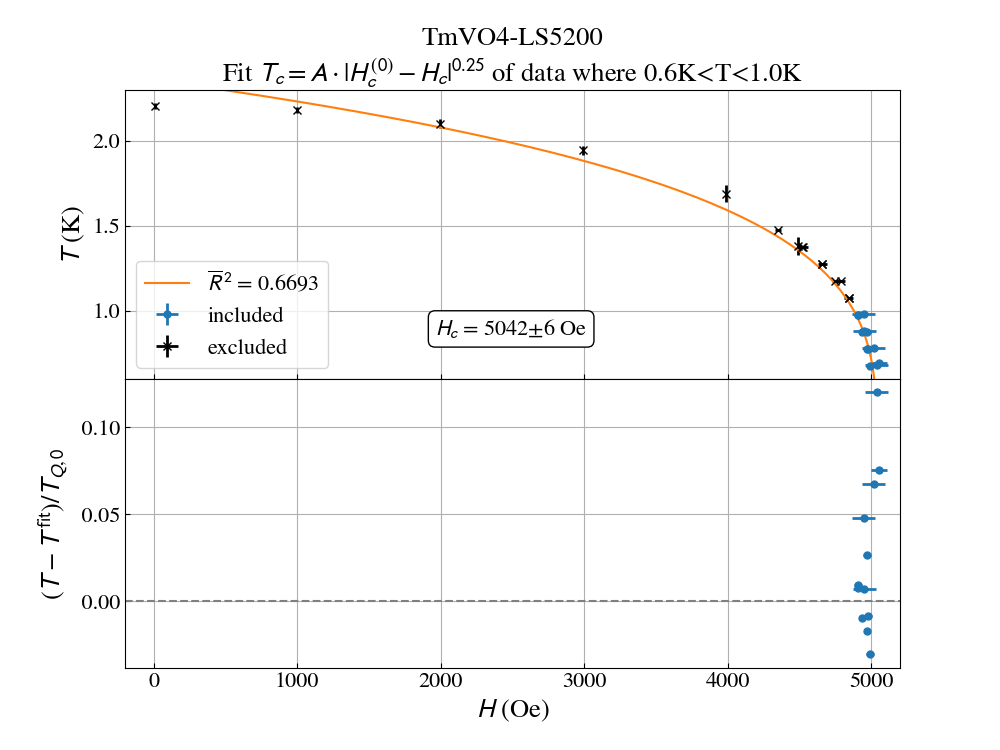

 Ndata:12; R^2:0.699335; adj-R^2:0.669268; Hc:5041.72; Hc_err:5.89103; A:0.279992; A_err:0.0074325;


<IPython.core.display.Javascript object>


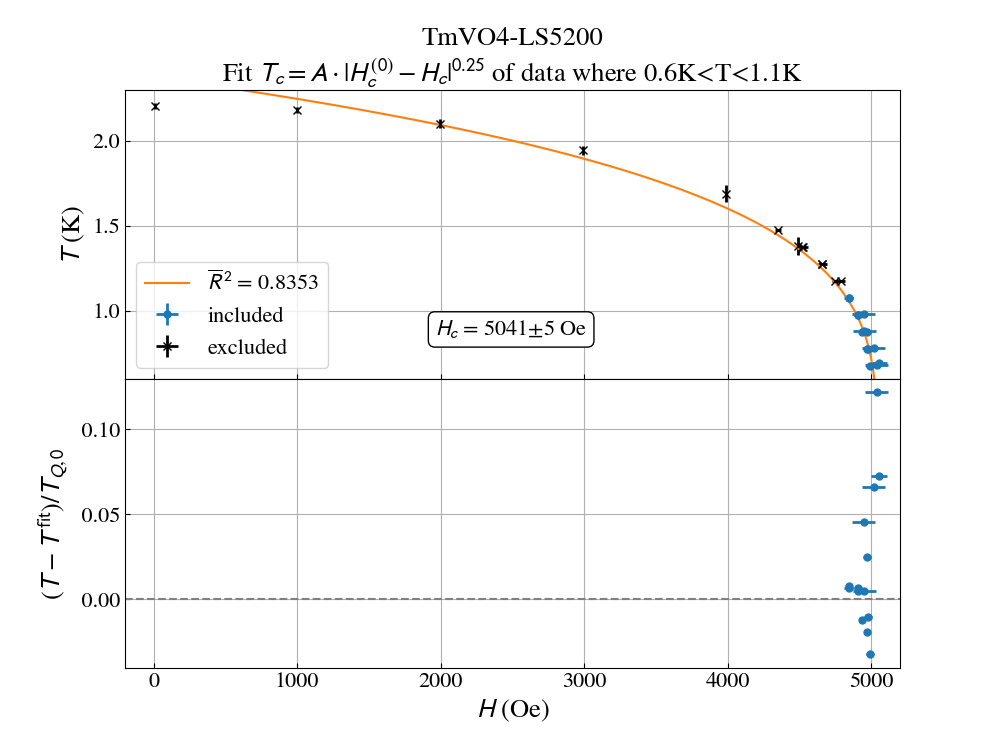

 Ndata:14; R^2:0.847955; adj-R^2:0.835284; Hc:5041.42; Hc_err:5.18056; A:0.281927; A_err:0.0057835;


<IPython.core.display.Javascript object>


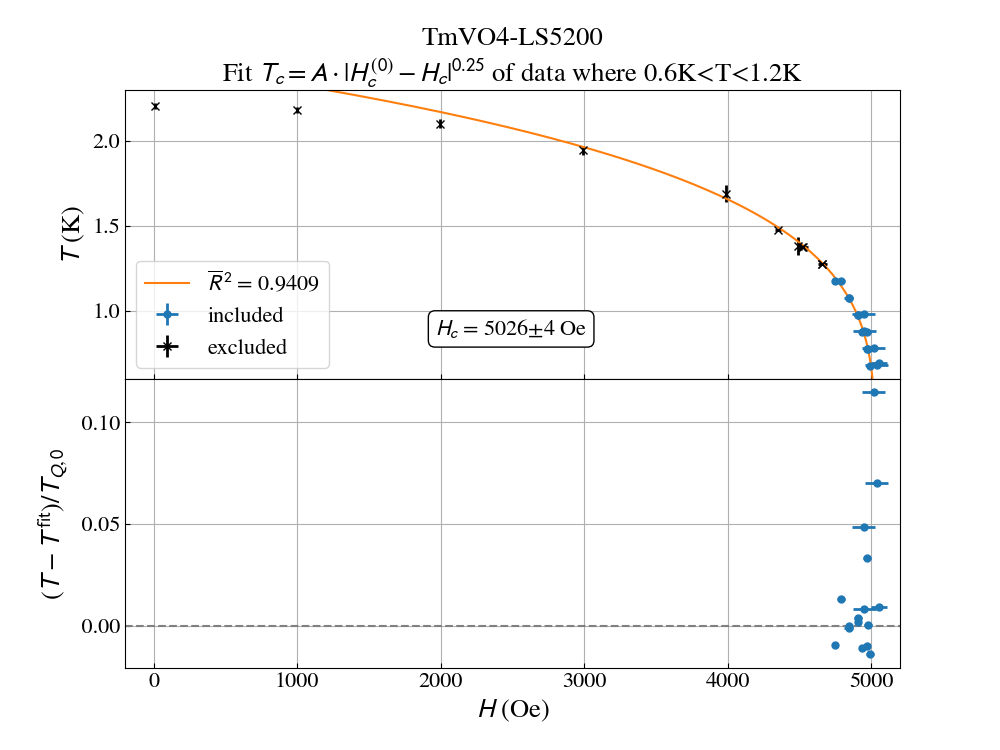

 Ndata:16; R^2:0.944842; adj-R^2:0.940902; Hc:5026.17; Hc_err:4.19625; A:0.292578; A_err:0.00418431;


<IPython.core.display.Javascript object>


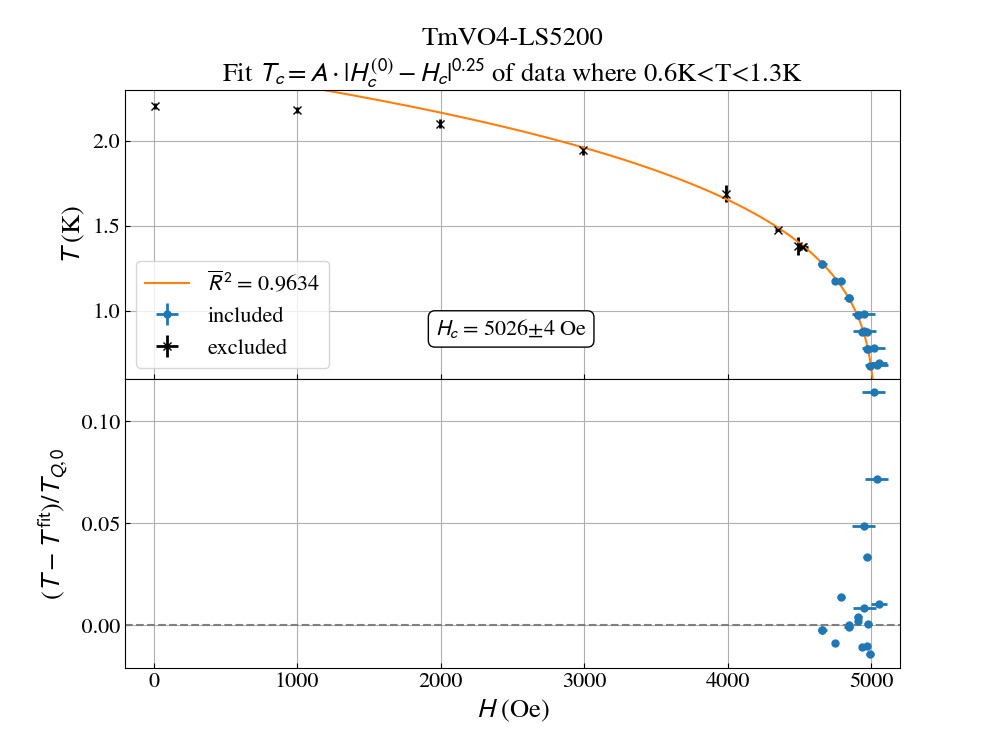

 Ndata:18; R^2:0.965566; adj-R^2:0.963414; Hc:5026.36; Hc_err:3.77933; A:0.292119; A_err:0.00333781;


<IPython.core.display.Javascript object>


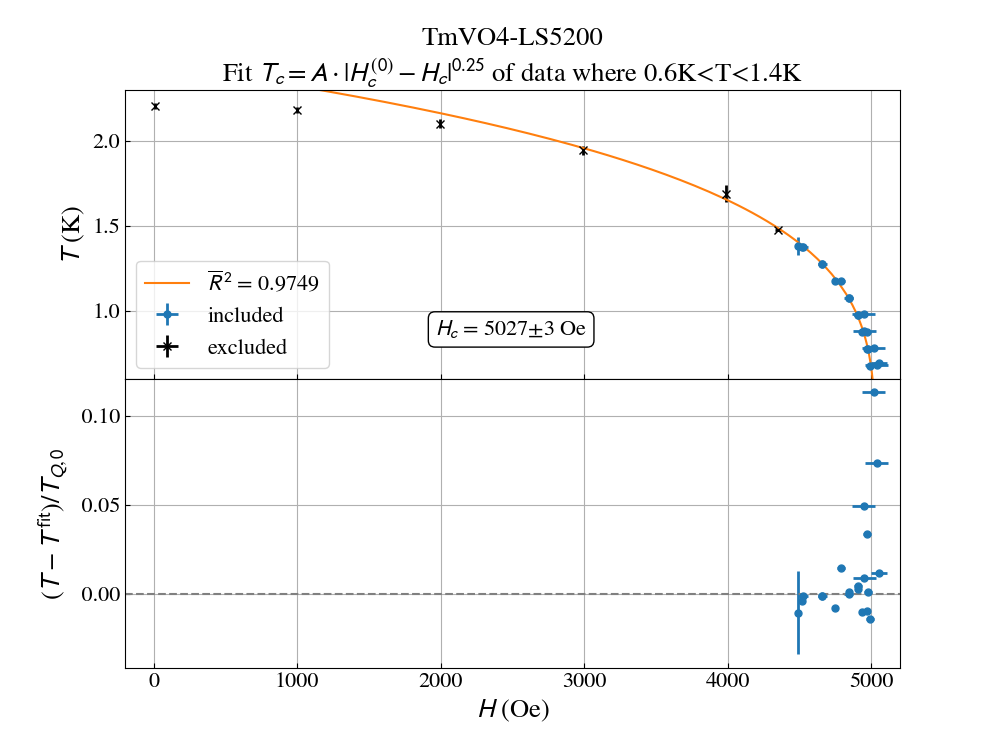

 Ndata:21; R^2:0.976176; adj-R^2:0.974923; Hc:5026.6; Hc_err:3.36827; A:0.291617; A_err:0.00266635;


<IPython.core.display.Javascript object>


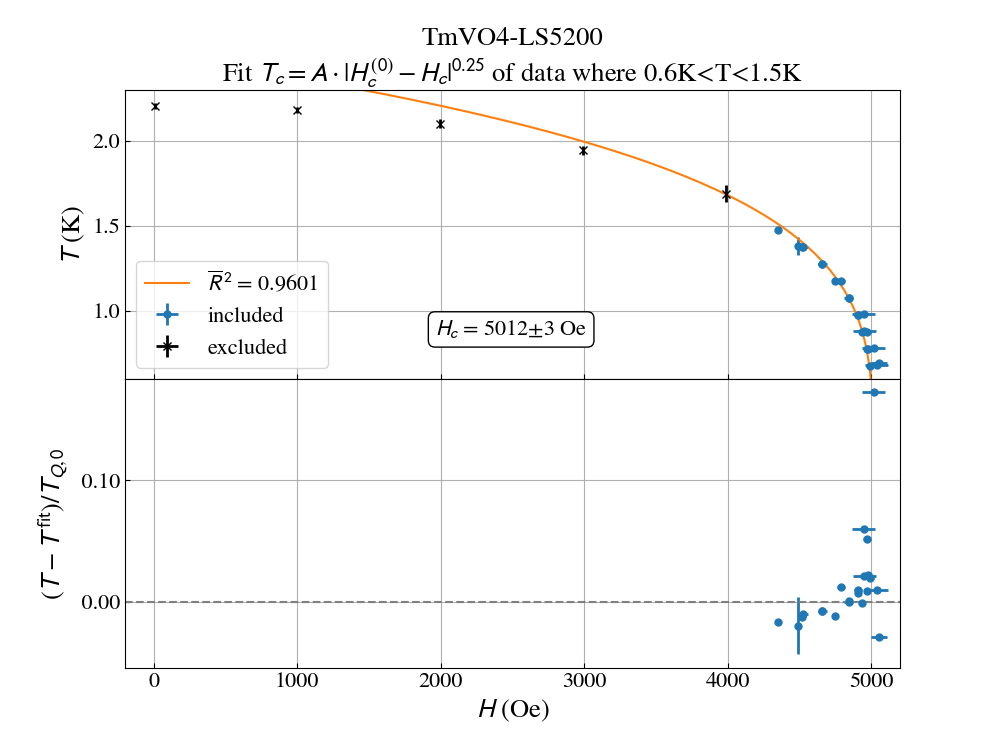

 Ndata:22; R^2:0.961979; adj-R^2:0.960078; Hc:5012.34; Hc_err:3.03428; A:0.297889; A_err:0.00321795;


<IPython.core.display.Javascript object>


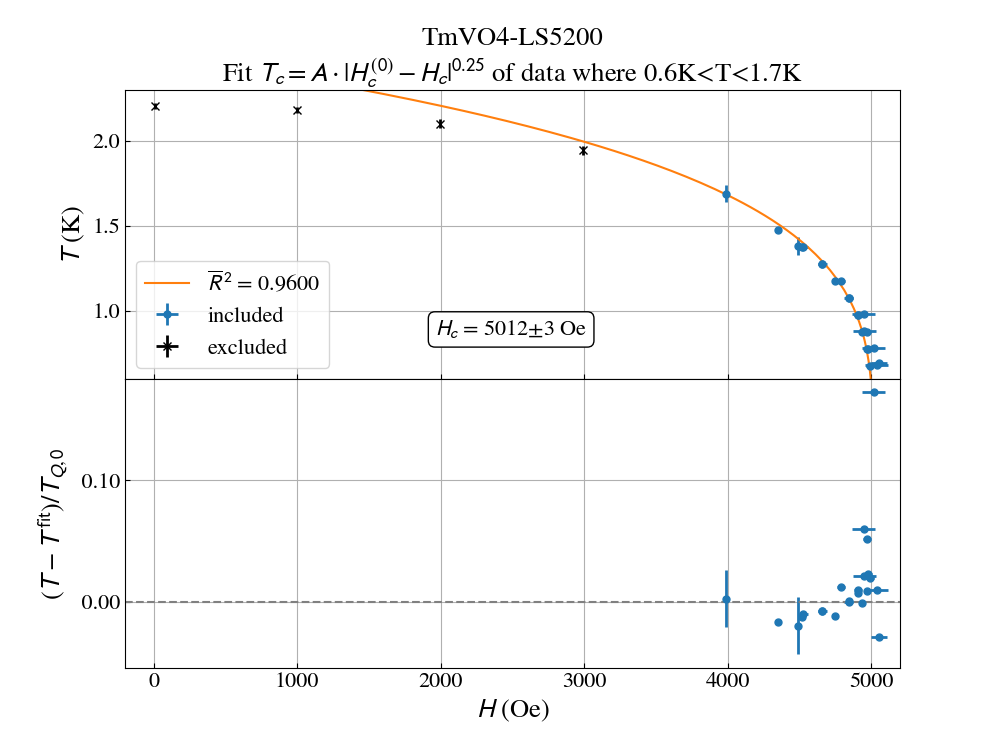

 Ndata:23; R^2:0.961804; adj-R^2:0.959985; Hc:5012.34; Hc_err:2.96052; A:0.297892; A_err:0.00313374;


<IPython.core.display.Javascript object>


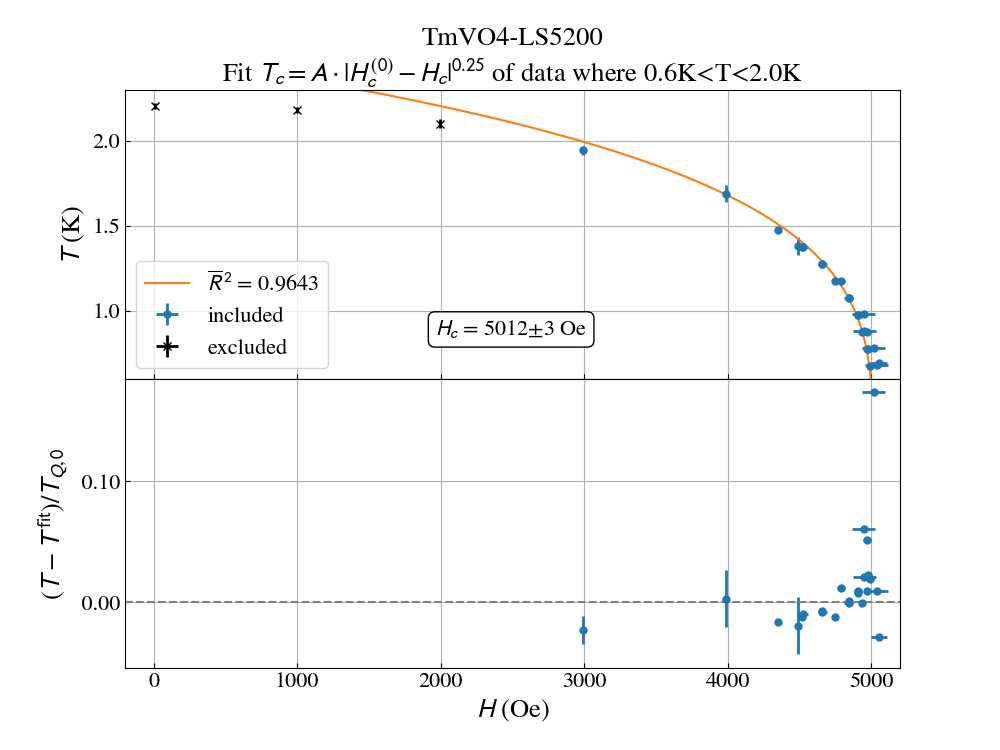

 Ndata:24; R^2:0.965859; adj-R^2:0.964307; Hc:5012.38; Hc_err:2.8875; A:0.29766; A_err:0.00302158;


<IPython.core.display.Javascript object>


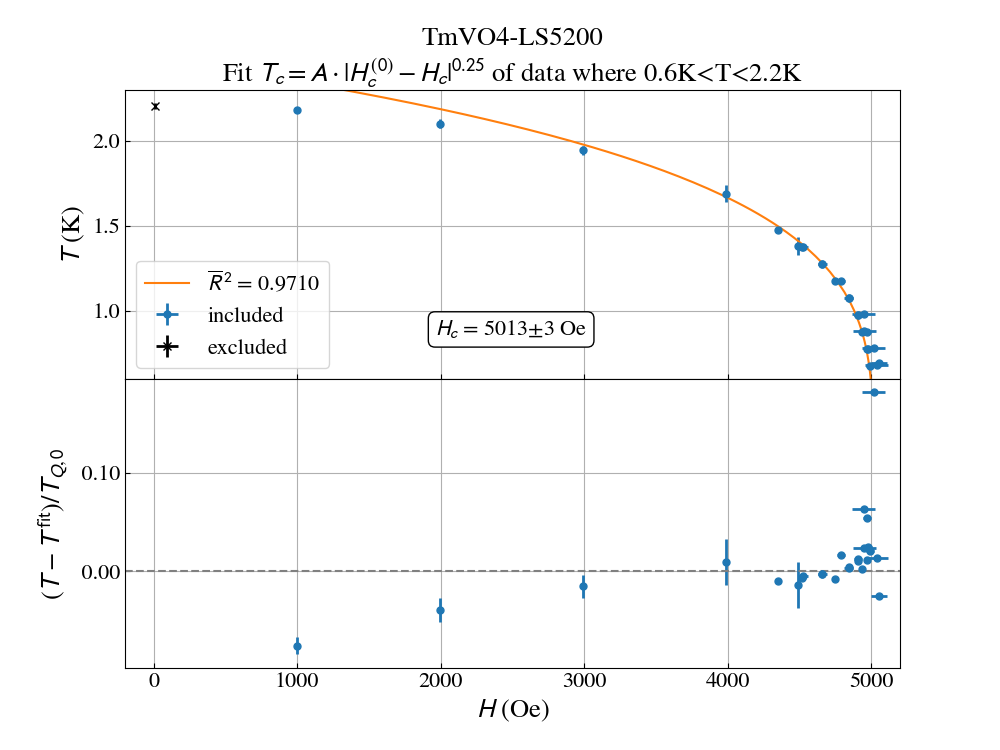

 Ndata:26; R^2:0.972169; adj-R^2:0.97101; Hc:5012.83; Hc_err:2.99939; A:0.295186; A_err:0.0030462;


<IPython.core.display.Javascript object>


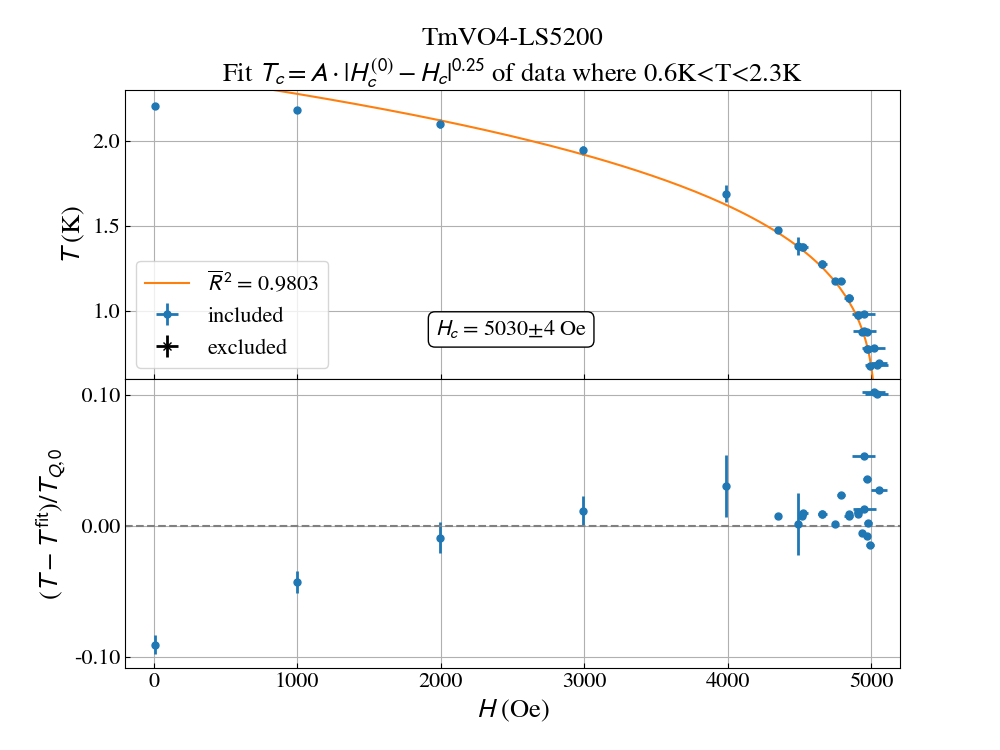

 Ndata:27; R^2:0.981071; adj-R^2:0.980314; Hc:5029.94; Hc_err:4.28382; A:0.285809; A_err:0.00275916;


<IPython.core.display.Javascript object>


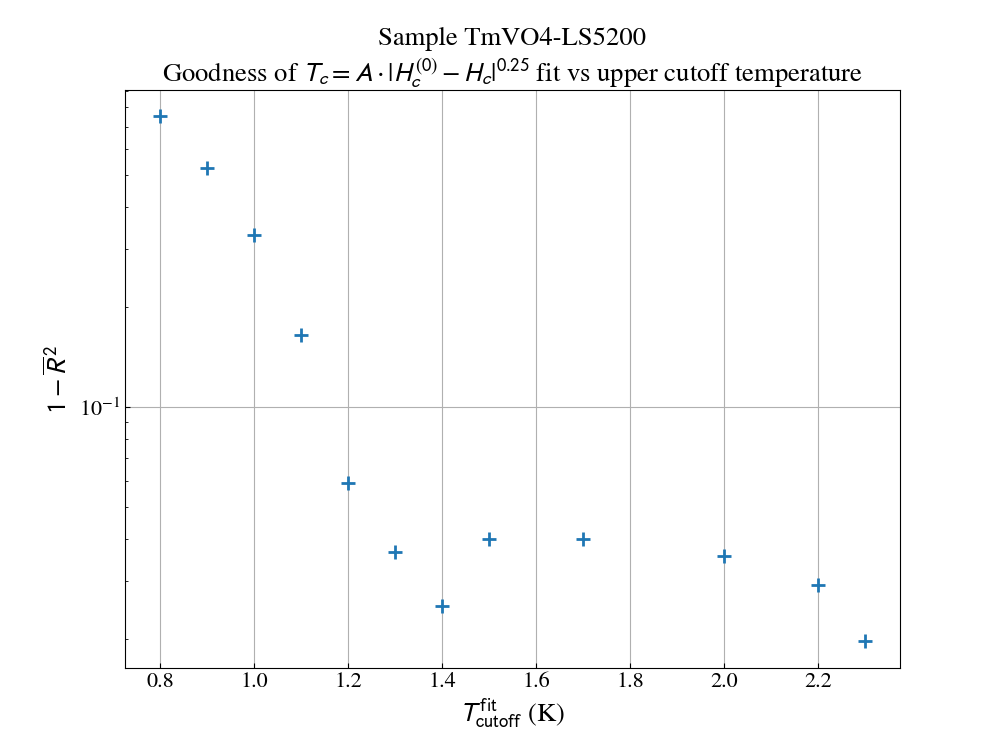

In [174]:
rmf_params.add('psi', value=.25, vary=False)# exponent of power law fit; one of [.5, .67, .25, .4]
psi = rmf_params['psi'].value

for idx in range(1):
    # Data
    sample = samples[idx]
    Hc_data = pb[idx]['Hc_inferred']
    Tc_data = pb[idx]['Tc']
    Tc_err = pb[idx]['Tc_Err (K)']
    Hc_err = pb[idx]['dHc']
    err = pb[idx]['rErr']
    
    rmf_fit_list[idx] = {}

    ymin0 = round(Tc_data.min()-.05,1)
    ymax0 = round(Tc_data.max()+.05,1)
    ylim_rng = range(round(10*ymin0), round(10*ymax0)+1)# *10 because range only takes integer-like input
    rmf_ylim = ylim_rng[:]# Subrange of ymax_rng to loop over (mostly for test purposes)
    
    for ylim_idx, ylim10 in enumerate(rmf_ylim):
        # Data selection for fit 
        this_ylim = ylim10/10# base temperature of fit is 1/10 of ylim10 (by construction of ymax_rng)
        cutoff = 'upper'
        ymin = {'lower':this_ylim, 'upper':ymin0}
        ymax = {'lower':ymax0, 'upper':this_ylim}
#         ymin_rng = range(round(10*Tc_data.min()-.5), round(this_ylim-3.5))# *10 because range only takes integer-like input
        ysel = data_selection(Tc_data, temp_max=ymax[cutoff], temp_min=ymin[cutoff])
        
        # If there are less than 5 data points
        # or if data selection is the same as in the previous iteration of the loop, skip to next iteration
        if len(ysel[ysel])<5 or ylim_idx>0 and np.array_equal(ysel, ysel_ref): continue
        ysel_ref = ysel# To compare data selection with that of next iteration        

        # Perform fit
        try:
            out = minimize(rmf_residual, rmf_params, args=(Hc_data[ysel], Tc_data[ysel]), 
                           kws={'weights':1/err[ysel]})
        except ValueError as verr:
            print(verr)
            break

        A_fit = out.params['A'].value
        A_fit_err = out.params['A'].stderr
        Hc_fit = out.params['Hc'].value
        Hc_fit_err = out.params['Hc'].stderr
        rsqr, adjrsqr = rsquare(Tc_data[ysel], out, eps_data=err[ysel], adjusted=True)

        # Store fit parameters
        rmf_fit_list[idx][this_ylim] = {'Ndata':out.ndata, 'R^2':rsqr, 'adj-R^2':adjrsqr, 
                                        'Hc':Hc_fit, 'Hc_err':Hc_fit_err, 'A':A_fit, 'A_err':A_fit_err}

        # Compute fit curve
        xfit = np.concatenate([np.linspace(0,.96,97),1-np.logspace(-1.5,-5)]) * Hc_fit
        yfit = rmf_model(xfit, A_fit, Hc_fit, psi)#A_fit*(Hc_fit-xfit)**psi

        # Create figure + axes
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

        # Plot data + fit
        fit_str = f'$ T_c = A \cdot | H_c^{{(0)}} - H_c | ^{{{psi}}}$'
        title = f'Fit {fit_str} of data where {ymin[cutoff]}K<T<{ymax[cutoff]}K'# Plot title
        plot_fitted_data(ax1, (Hc_data, Tc_data, Hc_err, Tc_err), ysel, Hc_fit)
        ax1.plot(xfit, yfit, label=f'$\overline{{R}}\,^2$ = {adjrsqr:.4f}')
        ax1.set_title(''.join([sample, '\n', title]))
        ax1.legend()
        ax1.annotate(''.join([f'$H_c$ = {Hc_fit:.0f}$\pm${rmf_fit_list[idx][this_ylim]["Hc_err"]:.0f} Oe']), 
                     xy=(.4, .15), xycoords='axes fraction', 
                     bbox=dict(boxstyle='round', fc='w'))# add annotation

        # Plot residual
        fit_residual = rmf_residual(out.params, Hc_data, Tc_data, weights=None)
        plot_fit_residual(ax2, (Hc_data, fit_residual/Tc, Hc_err, Tc_err/Tc), ysel, plot_excluded=False)

        # Print fit parameters
        fit_prms = ''.join([f' {k}:{v:.6g};' for k, v in rmf_fit_list[idx][this_ylim].items()])
        print(fit_prms)

    # Plot goodness of fit versus temperature cutoff 
    Tcutoff, Rsqr = zip(*[(this_ylim, 1-rmf_fit_list[idx][this_ylim]['adj-R^2']) for this_ylim in rmf_fit_list[idx].keys()])
    title_1 = f'Sample {sample}\nGoodness of {fit_str} fit vs {cutoff} cutoff temperature'
    fig, ax = plt.subplots()
    plot_rsqr(ax, (Tcutoff, Rsqr), title1=title_1)
    
# Check that the residual array computed by lmfit is the same as that computed manually
# to a precision of 1e-15, 
# np.array_equal(np.round(out.residual*err[ysel] - fit_residual[ysel], 15), np.zeros(fit_residual[ysel].shape))


In [180]:
os.chdir(f'{mce_data_dir[sample]}/Tc_vs_Hc')
print(sample, os.getcwd())
saveFitFig = f'{str(today)}_{sample}_power_law_fit_psi={str(psi).replace(".","p")}.png'
saveRsqrFig = f'{str(today)}_{sample}_power_law_fit_psi={str(psi).replace(".","p")}_Rsqr.png'
plt.figure(num=81)
# plt.savefig(saveFitFig, dpi=200, bbox_inches='tight')
plt.figure(num=85)
# plt.savefig(saveRsqrFig, dpi=200, bbox_inches='tight')

TmVO4-LS5200 C:\Users\Pierre\Desktop\Postdoc\TmVO4\TmVO4_heat-capacity\2017-07_TmVO4_Cp_MCE\2017-07-28--31\Massaic_MCE\Extracted_critical_fields\Tc_vs_Hc
